# AIRBNB NEW YORK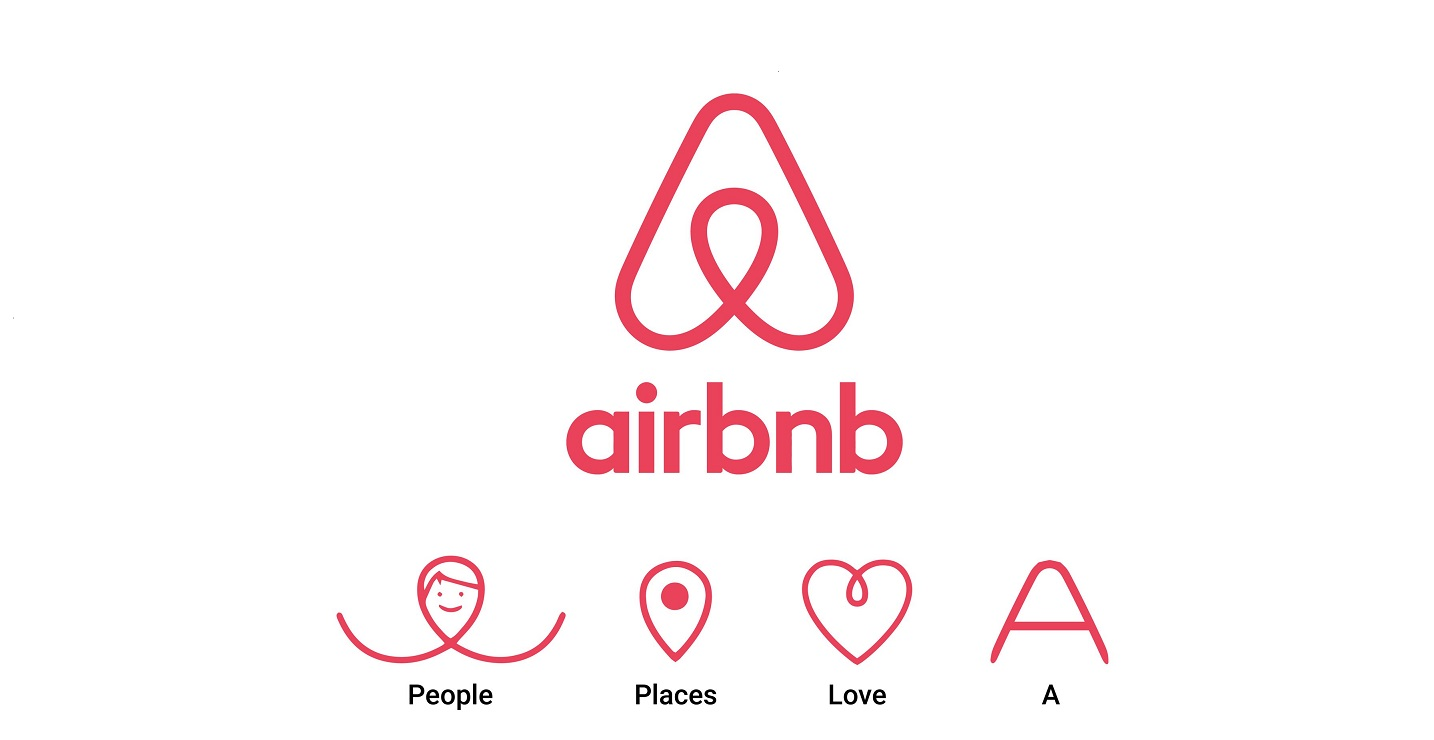

##Abstracto de motivación

En la vida cotidiana, definitivamente existe desigualdad entre las distintas organizaciones, tales como grandes empresas y pequeñas, personas, pobres y ricos, triunfadores y perezosos. Es ideal ver este tipo de grietas o contrastes y podemos profundizar en sus características y conocerlos mejor en función de cómo se comportan (siempre que tengamos los datos). En el caso particular bajo estudio, se presentan datos de los alojamientos de Airbnb de Nueva York – ciudad mundialmente conocida –.
Airbnb es una plataforma digital en la que hospedadores ofrecen sus propiedades para que visitantes de distintas ciudades se alojen allí y obtengan una experiencia p2p relativo al alquiler temporario de habitaciones compartidas/privadas o departamentos. Esto permite que exista un gran abanico de posibilidades para viajar y encontrar el alojamiento adecuado a las necesidades del viajero ya que se piensa que el anfitrión tiene el deber de brindar un servicio personalizado y único para cada cliente.
Justamente, la reserva del alojamiento es uno de los problemas más típicos a resolver, cuando llega la hora de viajar a otra ciudad/país. Asimismo, uno de los factores más importantes que observa el viajero es el precio ya que ello depende estrictamente del presupuesto con el que cuenta cada cual. Por otro lado, el anfitrión evaluará el precio al que alquilará el alojamiento en función de la rentabilidad esperada.



##Audiencia
El caso está orientado para que las conclusiones puedan ser usadas para la toma de decisiones de las partes interesadas, a saber: anfitriones, viajeros, potenciales anfitriones, competidores de otras plataformas como Booking, eDreams, etc., líderes de la plataforma, entre otros.


##Definición del objetivo
Será posible efectuar un análisis predictivo a partir de las variables más sensibles de los datos brindados como podría ser el precio de un nuevo alojamiento en función de la ubicación, tipo de alojamiento, cantidad de reseñas y nombre en la plataforma, comprensión del comportamiento y rendimiento de viajeros y anfitriones en la plataforma, orientación de iniciativas de marketing, implementación de servicios adicionales innovadores, efectuar recomendaciones para los anfitriones de bajos ingresos y hacer que sus alojamientos sean más rentables y obtengan más ingresos que antes. 

##Contexto comercial
Airbnb es un enorme mercado en línea para que la gente común alquile lugares para quedarse. Es un mercado grande y lucrativo, pero muchos anfitriones son simplemente personas que alquilan su propia residencia principal para visitas breves. Incluso los anfitriones más grandes suelen ser pequeñas empresas con solo una pequeña cantidad de lugares para alquilar porque el espíritu de la plataforma es brindar un servicio de alojamiento sumamente personalizado y orientado hacia la experiencia del cliente. Como resultado, tienen una capacidad limitada para evaluar tendencias a gran escala y establecer precios óptimos.


## Problema comercial 


*   ¿Qué características son más relevantes para el precio de un alojamiento de Airbnb en la ciudad de Nueva York?
*   ¿Cómo y a qué precio debería publicar su alojamiento un anfitrión (potencial o existente)?

La hipótesis parte de que el precio de un alojamiento depende de su ubicación, del tipo de alojamiento, cantidad de reseñas y la descripción brindada por el anfitrión. Esto se debe a que en las zonas más céntricas en la que se encuentran los principales puntos turísticos y compañías internacionales, serán los más costosos por la comodidad de transportarse en Nueva York de forma ágil. Además, cuan mayor sea la privacidad del alojamiento, más elevado será el precio ya que si tiene más comodidades como una casa/departamento entero o habitación privada, sería lógico que sea más caro que una habitación compartida. Otro factor determinante es la cantidad de reseñas que tenga el anfitrión porque se supone que, si hay más opiniones, indicaría que tuvo más reservaciones y es más popular. Por último, la descripción que haga el anfitrión sería vital para la definición del precio ya que es la primera impresión / imagen que tiene el viajero respecto al alojamiento.


#PARTE 1

## Contexto analítico
En el data set fue obtenido desde Keaggle y está en formato de CSV (almacenado en la carpeta “Entregable 1” ya creada) separado entre “ , “ . Hay información relativa al anfitrión (id, nombre), ubicación del alojamiento (barrio, grupo del barrio, latitud, longitud), tipo de alojamiento, reseñas (fecha de la última, cantidad por mes) y disponibilidad para alquilar al año. 


In [ ]:
import pandas as pd
from google.colab import drive 
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Data science/Entregable 1'
dforiginal = pd.read_csv('AB_NYC_2019.csv',sep=',')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Data science/Entregable 1


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
from   scipy import stats
import numpy as np
import statsmodels.formula.api as sm
import os

In [ ]:
# Le damos una mirada a las primeras 5 filas del data set
dforiginal.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

## **Data Acquisition**


Se toma un data set de Keaggle para enriquecer de columnas al proyecto final

In [ ]:
%cd '/content/gdrive/MyDrive/Data science/Entregable 1'
dfextra = pd.read_csv('airbnb-listings.csv',sep=';')

/content/gdrive/MyDrive/Data science/Entregable 1


In [ ]:
#Remplazamos la columna de ID del data set extra por id para despues aplicar un inner join 
dfextra.rename(columns={'ID':'id'},
               inplace=True)
dfextra.columns

Index(['id', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

Sabiendo del peso del data set extra, se hace una pre fase de data wrangling

In [ ]:
dfextra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494954 entries, 0 to 494953
Data columns (total 89 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              494954 non-null  object 
 1   Listing Url                     494954 non-null  object 
 2   Scrape ID                       494954 non-null  object 
 3   Last Scraped                    494953 non-null  object 
 4   Name                            494536 non-null  object 
 5   Summary                         478753 non-null  object 
 6   Space                           347019 non-null  object 
 7   Description                     494794 non-null  object 
 8   Experiences Offered             494954 non-null  object 
 9   Neighborhood Overview           291604 non-null  object 
 10  Notes                           197643 non-null  object 
 11  Transit                         303786 non-null  object 
 12  Access          

In [ ]:
# Dada la extensa longitud del data set extra, eliminamos columnas reiterativas por su titulo como las de URL, algunas vinculadas con
# la ubicacion y la disponibilidad
dfextra.drop(['Listing Url', 'Scrape ID', 'Last Scraped', 'Notes', 'Thumbnail Url','Medium Url', 'Picture Url','XL Picture Url',
              'Host Thumbnail Url', 'Host Picture Url', 'Zipcode','Market', 'Smart Location','Country Code','Country',
              'Calendar Updated', 'Has Availability', 'Availability 30', 'Availability 60', 'Availability 90', 'Calendar last Scraped',
              'License', 'Jurisdiction Names', 'Neighborhood Overview', 'Interaction', 'Access', 'Host Acceptance Rate',
              'Host URL'], axis = 'columns', inplace=True)
dfextra.head(1)

id                         Name                Summary Space  \
0  15802051  Large double available now.  Double room available   NaN   

             Description Experiences Offered Transit House Rules   Host ID  \
0  Double room available                none     NaN         NaN  46296095   

  Host Name  ... Review Scores Cleanliness Review Scores Checkin  \
0     Miles  ...                       9.0                  10.0   

  Review Scores Communication Review Scores Location  Review Scores Value  \
0                         9.0                   10.0                 10.0   

  Cancellation Policy  Calculated host listings count  Reviews per Month  \
0              strict                             2.0               0.83   

                             Geolocation              Features  
0  51.4814235208219,-0.11325857795918481  Host Has Profile Pic  

[1 rows x 61 columns]

In [ ]:
df=pd.merge(left=dforiginal, right=dfextra, on='id',how='inner')
df.head(1)

id                   name  host_id host_name neighbourhood_group  \
0  2595  Skylit Midtown Castle     2845  Jennifer           Manhattan   

  neighbourhood  latitude  longitude        room_type  price  ...  \
0       Midtown  40.75362  -73.98377  Entire home/apt    225  ...   

   Review Scores Cleanliness  Review Scores Checkin  \
0                        9.0                    9.0   

  Review Scores Communication  Review Scores Location  Review Scores Value  \
0                         9.0                    10.0                  9.0   

   Cancellation Policy Calculated host listings count Reviews per Month  \
0               strict                            2.0              0.22   

                            Geolocation  \
0  40.75362072657246,-73.98377381114605   

                                            Features  
0  Host Has Profile Pic,Host Identity Verified,Re...  

[1 rows x 76 columns]

##**Data Wrangling**

### Descubrimiento

In [ ]:
# Veremos el tamaño del dataset
df.shape

(16658, 76)

In [ ]:
# Se toma conocimiento de los tipos de datos en cada columna y si tiene nulos o no
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16658 entries, 0 to 16657
Data columns (total 76 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16658 non-null  object 
 1   name                            16645 non-null  object 
 2   host_id                         16658 non-null  int64  
 3   host_name                       16647 non-null  object 
 4   neighbourhood_group             16658 non-null  object 
 5   neighbourhood                   16658 non-null  object 
 6   latitude                        16658 non-null  float64
 7   longitude                       16658 non-null  float64
 8   room_type                       16658 non-null  object 
 9   price                           16658 non-null  int64  
 10  minimum_nights                  16658 non-null  int64  
 11  number_of_reviews               16658 non-null  int64  
 12  last_review                     

In [ ]:
df.dtypes

id                                 object
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Transit                            object
House Rules                        object
Host ID                           

In [ ]:
df.describe()

host_id      latitude     longitude         price  minimum_nights  \
count  1.665800e+04  16658.000000  16658.000000  16658.000000    16658.000000   
mean   2.599734e+07     40.728447    -73.955898    147.671749        5.499100   
std    2.868705e+07      0.054206      0.039873    243.965739       21.570792   
min    2.571000e+03     40.499790    -74.240840     10.000000        1.000000   
25%    4.185078e+06     40.688553    -73.982500     70.000000        1.000000   
50%    1.531095e+07     40.721210    -73.956770    105.000000        2.000000   
75%    3.909266e+07     40.763717    -73.940825    170.000000        4.000000   
max    1.284172e+08     40.908040    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       16658.000000       13941.000000                    16658.000000   
mean           41.083143           1.058944                        1.773082   
std            63.197848           1.391906                        3.365761   
min             0.000000           0.010000                        1.000000   
25%             1.000000           0.110000                        1.000000   
50%            11.000000           0.430000                        1.000000   
75%            58.000000           1.580000                        2.000000   
max           629.000000          16.220000                      121.000000   

       availability_365       Host ID  ...  Number of Reviews  \
count      16658.000000  1.665800e+04  ...       16658.000000   
mean          93.479169  2.599734e+07  ...          18.155601   
std          127.567633  2.868705e+07  ...          32.906088   
min            0.000000  2.571000e+03  ...           0.000000   
25%            0.000000  4.185078e+06  ...           1.000000   
50%            0.000000  1.531095e+07  ...           4.000000   
75%          192.000000  3.909266e+07  ...          20.000000   
max          365.000000  1.284172e+08  ...         432.000000   

       Review Scores Rating  Review Scores Accuracy  \
count          12822.000000            12781.000000   
mean              93.711355                9.600188   
std                7.873031                0.766420   
min               20.000000                2.000000   
25%               91.000000                9.000000   
50%               96.000000               10.000000   
75%              100.000000               10.000000   
max              100.000000               10.000000   

       Review Scores Cleanliness  Review Scores Checkin  \
count               12795.000000           12773.000000   
mean                    9.271825               9.759884   
std                     1.082374               0.642756   
min                     2.000000               2.000000   
25%                     9.000000              10.000000   
50%                    10.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       Review Scores Communication  Review Scores Location  \
count                 12795.000000            12777.000000   
mean                      9.797499                9.414964   
std                       0.587260                0.822919   
min                       2.000000                2.000000   
25%                      10.000000                9.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       Review Scores Value  Calculated host listings count  Reviews per Month  
count         12778.000000                    16658.000000       13063.000000  
mean              9.400376                        1.621743           1.209858  
std               0.834026                        2.292602           1.546926  
min               2.000000                        1.000000           0.010000

In [ ]:
# Se toma conocimiento de las columnas
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Name', 'Summary', 'Space', 'Description',
       'Experiences Offered', 'Transit', 'House Rules', 'Host ID', 'Host Name',
       'Host Since', 'Host Location', 'Host About', 'Host Response Time',
       'Host Response Rate', 'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Latitude',
       'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price',
       'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included

#### Detalle de columnas

Sintesis de los datos de las columnas

1. id: numero de registro
2. name: nombre del alojamiento
3. host_id: nombre del anfitrion
4. neighbourhood_group: distrito de la ciudad
5. neighbourhood: el barrio donde esta la propiedad
6.	longitude, latitude: longitud y latitud de la ubicación exacta del alojamiento
7.	room_type: tipo de propiedad como apartamento, condominio, etc
8.	price: precio del lugar
9. minimun_nights: cantidad minima de noches a reservar
10.	number_of_reviews: cantidad de reseñas dadoas por los clientes que alquilaron la propiedad
11. last_review: fecha de la ultima reseña
12. reviews_per_month: cantidad de reseñas por mes
13. calculated_host_listings_count
14. availability_365: disponibilidad de noches al año

**FALTA AGREGAR LAS DEL INNER JOIN**

####Balanceo y aproximación de la correlación

In [ ]:
df.price.value_counts()

100      737
150      717
75       508
200      493
50       473
60       470
80       451
120      422
65       407
125      395
70       381
90       380
85       342
250      322
99       312
45       311
55       297
110      292
175      288
95       285
40       242
130      232
140      202
180      189
115      181
160      174
300      166
135      164
199      157
225      152
69       145
105      141
145      136
89       132
79       131
49       126
165      124
35       123
195      115
350      107
170      107
59       105
190      104
149       96
155       89
185       88
220       76
275       74
139       73
119       72
30        70
129       69
500       67
109       64
400       58
98        58
47        57
39        56
450       52
72        51
68        49
48        49
159       48
52        48
189       47
62        47
325       47
38        46
179       46
42        46
78        44
58        43
88        43
249       43
295       42
169       41
77        41

In [ ]:
df.corr()

host_id  latitude  longitude     price  \
host_id                         1.000000  0.025200   0.136461 -0.034771   
latitude                        0.025200  1.000000   0.116243  0.016572   
longitude                       0.136461  0.116243   1.000000 -0.136703   
price                          -0.034771  0.016572  -0.136703  1.000000   
minimum_nights                 -0.028775 -0.005764  -0.026843  0.030727   
number_of_reviews              -0.041176 -0.017393   0.094884 -0.042364   
reviews_per_month               0.133409 -0.013897   0.134399 -0.042009   
calculated_host_listings_count  0.006131 -0.025114   0.084922 -0.002204   
availability_365               -0.003745 -0.044034   0.155883  0.053285   
Host ID                         1.000000  0.025200   0.136461 -0.034771   
Host Response Rate              0.014368 -0.018302   0.035950  0.003655   
Host Listings Count             0.010071 -0.001019   0.008866  0.016321   
Host Total Listings Count       0.010071 -0.001019   0.008866  0.016321   
Latitude                        0.025135  0.970551   0.112543  0.016705   
Longitude                       0.117179  0.103508   0.855494 -0.115739   
Accommodates                   -0.016173 -0.084859  -0.014025  0.311028   
Bathrooms                      -0.001883 -0.076804   0.001602  0.236355   
Bedrooms                       -0.030329 -0.106812   0.018270  0.224606   
Beds                            0.000452 -0.093440   0.006098  0.247603   
Square Feet                    -0.199155 -0.145808  -0.148633  0.480574   
Price                          -0.060602  0.036889  -0.266917  0.653056   
Weekly Price                   -0.108968  0.018145  -0.253978  0.129412   
Monthly Price                  -0.069554  0.043084  -0.220005  0.490294   
Security Deposit               -0.091896  0.027346  -0.151244  0.173995   
Cleaning Fee                   -0.078456 -0.023491  -0.184995  0.323084   
Guests Included                -0.025187 -0.068893   0.044700  0.144640   
Extra People                   -0.053487 -0.003487   0.009381  0.039490   
Minimum Nights                 -0.022552 -0.010638  -0.031379  0.020894   
Maximum Nights                  0.003440 -0.009761   0.001654 -0.001852   
Availability 365               -0.015669 -0.046531   0.157972  0.044395   
Number of Reviews              -0.183822 -0.009645   0.043636 -0.028753   
Review Scores Rating           -0.004108 -0.028139  -0.032956  0.028010   
Review Scores Accuracy          0.012173 -0.028238  -0.007153  0.022821   
Review Scores Cleanliness       0.032809 -0.029548   0.015586  0.029504   
Review Scores Checkin           0.000079 -0.028567  -0.009439 -0.018037   
Review Scores Communication    -0.023874 -0.028822  -0.019820 -0.003969   
Review Scores Location          0.001397  0.048925  -0.245972  0.066179   
Review Scores Value             0.034495 -0.024408   0.004700 -0.001351   
Calculated host listings count -0.003939 -0.046248   0.113496 -0.005119   
Reviews per Month               0.161900 -0.014480   0.139748 -0.044935   

                                minimum_nights  number_of_reviews  \
host_id                              -0.028775          -0.041176   
latitude                             -0.005764          -0.017393   
longitude                            -0.026843           0.094884   
price                                 0.030727          -0.042364   
minimum_nights                        1.000000          -0.047897   
number_of_reviews                    -0.047897           1.000000   
reviews_per_month                    -0.066166           0.897354   
calculated_host_listings_count        0.052644           0.039494   
availability_365                      0.056000           0.382923   
Host ID                              -0.028775          -0.041176   
Host Response Rate                   -0.011601           0.161434   
Host Listings Count                   0.027740          -0.002439   
Host Total Listings Count             0.027740          -0.0

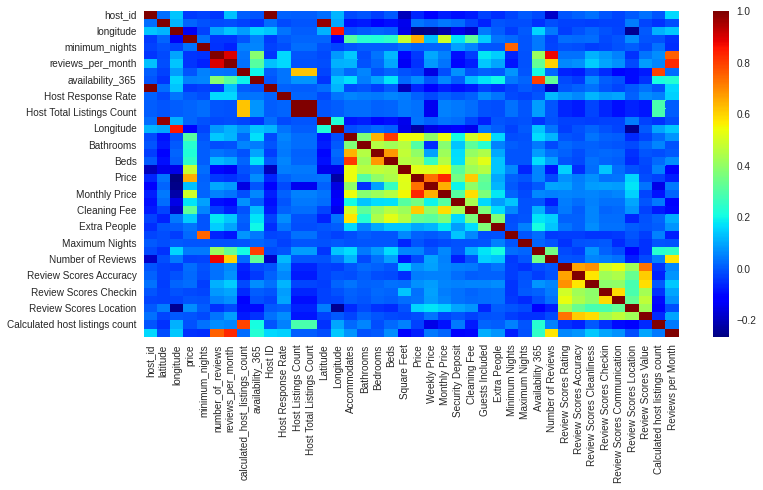

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='jet')

#### Periodo analizado

In [ ]:
# Se importa un data set de un calendario para conocer cual es el periodo bajo estudio 
calendar_df = pd.read_csv('calendar.csv',sep=',')
rows_num = calendar_df.shape[0]
# Se busca la fecha mas reciente y más antigua
min_date = calendar_df['date'].min()
max_date = calendar_df['date'].max()
print(min_date, max_date)

2016-01-04 2017-01-02



La fecha mas antigua observada es el 2016-01-04 y la fecha mas reciente es 2017-01-02

### Estructuración y limpieza

#### Datos duplicados

In [ ]:
print(df.shape)
df= df.drop_duplicates()
print(df.shape)

(16658, 76)
(16658, 76)


Se comprueba que no haya filas duplicadas para asegurarse y como forma de control del inner join usado

Se verifica que hay columnas con el mismo nombre y se decide eliminar: Latitude, Longitude, Host ID, Host Name y price

In [ ]:
df.drop(['Latitude', 'Longitude', 'price', 'Host ID', 'Host Name'], axis = 'columns', inplace=True)
df.head(1)

id                   name  host_id host_name neighbourhood_group  \
0  2595  Skylit Midtown Castle     2845  Jennifer           Manhattan   

  neighbourhood  latitude  longitude        room_type  minimum_nights  ...  \
0       Midtown  40.75362  -73.98377  Entire home/apt               1  ...   

   Review Scores Cleanliness Review Scores Checkin  \
0                        9.0                   9.0   

   Review Scores Communication  Review Scores Location  Review Scores Value  \
0                          9.0                    10.0                  9.0   

  Cancellation Policy Calculated host listings count Reviews per Month  \
0              strict                            2.0              0.22   

                            Geolocation  \
0  40.75362072657246,-73.98377381114605   

                                            Features  
0  Host Has Profile Pic,Host Identity Verified,Re...  

[1 rows x 71 columns]

#### Datos nulos

In [ ]:
# Se nota que hay muchos nulos, pero para comprobarlo, contaremos los nulos
df.isnull().sum()

id                                    0
name                                 13
host_id                               0
host_name                            11
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
last_review                        2717
reviews_per_month                  2717
calculated_host_listings_count        0
availability_365                      0
Name                                 15
Summary                             757
Space                              4899
Description                           6
Experiences Offered                   0
Transit                            5963
House Rules                        5667
Host Since                          105
Host Location                       167
Host About                         6048


In [ ]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


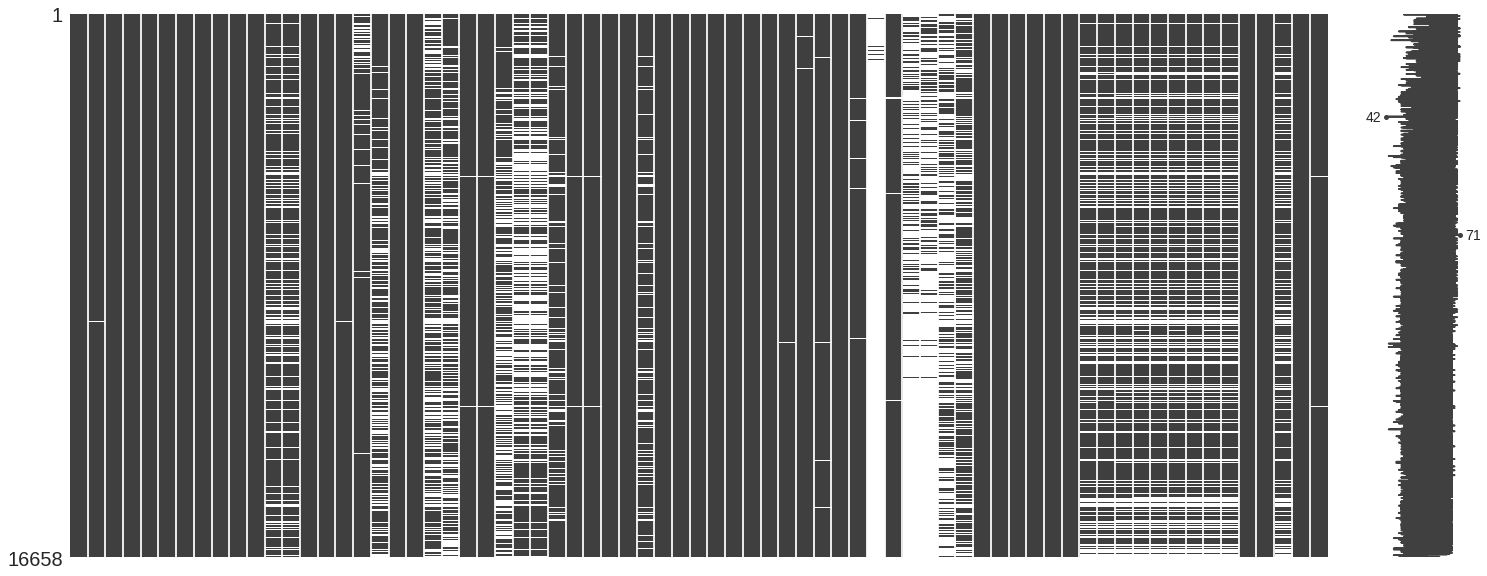

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
pd.set_option('display.max_rows', None) 
serie=(df.isnull().sum()/df.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

Square Feet                     98.307120
Weekly Price                    81.048145
Monthly Price                   78.562853
Security Deposit                57.569936
Host Response Rate              41.613639
Host Response Time              41.613639
Host About                      36.306880
Transit                         35.796614
House Rules                     34.019690
Cleaning Fee                    31.144195
Space                           29.409293
Review Scores Checkin           23.322128
Review Scores Location          23.298115
Review Scores Value             23.292112
Review Scores Accuracy          23.274103
Review Scores Cleanliness       23.190059
Review Scores Communication     23.190059
Review Scores Rating            23.027975
First Review                    21.581222
Reviews per Month               21.581222
Last Review                     21.305079
reviews_per_month               16.310481
last_review                     16.310481
Neighbourhood                   11


Se declaran las decisiones tomadas para el manejo de nulos 

* Hay datos faltantes que se observan y que no requieren de una imputación en particular.

1.	Todas las columnas cuyo % de relevancia de nulos es inferior al 5%, se decide no imputar nulos.
Serían las siguientes filas seguido de su porcentaje de cantidad de nulos: Summary 4.544363 Host Location 1.002521 Host Since 0.630328 Host Name 0.630328 Host Listings Count 0.630328 Host Total Listings Count 0.630328 Amenities 0.618322 Price 0.540281 Bathrooms 0.456237 Bedrooms 0.234122 Beds 0.156081 Features 0.096050 Name 0.090047 City 0.084044 name 0.078041 host_name 0.066034 Description 0.036019  Host Verifications 0.012006 Neighbourhood Group Cleansed 0.006003
2.	Se eliminan las columnas repetidas con mayor cantidad de nulos: Reviews per Month 21.581222 Last Review 21.305079 Neighbourhood 11.507984 Host Neighbourhood 9.953176 y otras columnas que no tienen nulos pero igualmente, se repiten (Latitude y Longitude)
3.	Se procede a eliminar las columnas que se mencionan a continuación dado que por su elevado % de nulos, distorsionaría el análisis.  
Serían las siguientes filas seguido de su porcentaje de cantidad de nulos: Square Feet 98.307120 Weekly Price 81.048145 Monthly Price 78.562853 
4.	Como hay datos que son nulos por no haber reseñas, respuestas por parte de los anfitriones, tasa de limpieza, tasa de seguridad, entre otros, es lógico que el valor sea nulo y por eso se lo reemplaza con el valor "0".
Serían las siguientes filas seguido de su porcentaje de cantidad de nulos:Security Deposit 57.569936 Host Response Time 41.613639 Host Response Rate 41.613639 Host About 36.306880 House Rules 34.019690 Cleaning Fee 31.144195 Review Scores Checkin 23.322128Review Scores Location 23.298115 Review Scores Value 23.292112 Review Scores Accuracy 23.274103 Review Scores Cleanliness 23.190059 Review Scores Communication 23.190059 Review Scores Rating 23.027975 First Review 21.581222 reviews_per_month 16.310481 last_review 16.310481 Transit 35.796614 Space 29.409293 
 


In [ ]:
# Decisión 2
df.drop(['Reviews per Month', 'Last Review', 'Neighbourhood', 'Host Neighbourhood'], axis = 'columns', inplace=True)
df.head(1)

id                   name  host_id host_name neighbourhood_group  \
0  2595  Skylit Midtown Castle     2845  Jennifer           Manhattan   

  neighbourhood  latitude  longitude        room_type  minimum_nights  ...  \
0       Midtown  40.75362  -73.98377  Entire home/apt               1  ...   

   Review Scores Accuracy Review Scores Cleanliness  Review Scores Checkin  \
0                     9.0                       9.0                    9.0   

   Review Scores Communication  Review Scores Location Review Scores Value  \
0                          9.0                    10.0                 9.0   

  Cancellation Policy Calculated host listings count  \
0              strict                            2.0   

                            Geolocation  \
0  40.75362072657246,-73.98377381114605   

                                            Features  
0  Host Has Profile Pic,Host Identity Verified,Re...  

[1 rows x 67 columns]

In [ ]:
# Decisión 3
df.drop(['Square Feet', 'Weekly Price', 'Monthly Price'], axis = 'columns', inplace=True)
df.head(1)

id                   name  host_id host_name neighbourhood_group  \
0  2595  Skylit Midtown Castle     2845  Jennifer           Manhattan   

  neighbourhood  latitude  longitude        room_type  minimum_nights  ...  \
0       Midtown  40.75362  -73.98377  Entire home/apt               1  ...   

   Review Scores Accuracy Review Scores Cleanliness  Review Scores Checkin  \
0                     9.0                       9.0                    9.0   

   Review Scores Communication  Review Scores Location Review Scores Value  \
0                          9.0                    10.0                 9.0   

  Cancellation Policy Calculated host listings count  \
0              strict                            2.0   

                            Geolocation  \
0  40.75362072657246,-73.98377381114605   

                                            Features  
0  Host Has Profile Pic,Host Identity Verified,Re...  

[1 rows x 64 columns]

In [ ]:
#Decisión 4
# Se reemplaza los nulos con el 0 en la columna reviews_per_month
df.fillna({'Security Deposit':0}, inplace=True)
df.fillna({'Host Response Time':0}, inplace=True)
df.fillna({'Host Response Rate':0}, inplace=True)
df.fillna({'Host About':0}, inplace=True)
df.fillna({'House Rules':0}, inplace=True)
df.fillna({'Cleaning Fee':0}, inplace=True)
df.fillna({'Review Scores Checkin':0}, inplace=True)
df.fillna({'Review Scores Location':0}, inplace=True)
df.fillna({'Review Scores Value':0}, inplace=True)
df.fillna({'Review Scores Accuracy':0}, inplace=True)
df.fillna({'Review Scores Cleanliness':0}, inplace=True)
df.fillna({'Review Scores Communication':0}, inplace=True)
df.fillna({'Review Scores Rating':0}, inplace=True)
df.fillna({'First Review':0}, inplace=True)
df.fillna({'reviews_per_month':0}, inplace=True)
df.fillna({'last_review':0}, inplace=True)
df.fillna({'Transit':0}, inplace=True)
df.fillna({'Space':0}, inplace=True)
df.fillna({'Price':0}, inplace=True)

#### Outliers

In [ ]:
col_float=[x for x in df.columns if (df[x].dtype=='float')]
print(col_float)

['latitude', 'longitude', 'reviews_per_month', 'Host Response Rate', 'Host Listings Count', 'Host Total Listings Count', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 365', 'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Calculated host listings count']


In [ ]:
df[df.dtypes[df.dtypes== float].index].quantile(0.75)-df[df.dtypes[df.dtypes== float].index].quantile(0.25)

latitude                             0.075165
longitude                            0.041675
reviews_per_month                    1.210000
Host Response Rate                 100.000000
Host Listings Count                  1.000000
Host Total Listings Count            1.000000
Accommodates                         2.000000
Bathrooms                            0.000000
Bedrooms                             0.000000
Beds                                 1.000000
Price                               95.000000
Security Deposit                   200.000000
Cleaning Fee                        65.000000
Guests Included                      1.000000
Extra People                        20.000000
Minimum Nights                       3.000000
Maximum Nights                    1095.000000
Availability 365                   250.000000
Number of Reviews                   19.000000
Review Scores Rating                20.000000
Review Scores Accuracy               2.000000
Review Scores Cleanliness         

In [ ]:
import numpy as np
def imputar_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   upper = df[~(df>(q3+1.5*IQR))].max()
   lower = df[~(df<(q1-1.5*IQR))].min()
   df = np.where(df > upper, # si el valor es mayor al q3
                 df.median(), # remplazar por la media
                 np.where(df < lower, # en caso contrario si es menor que el lower limit
                          df.median(), # tambien reemplazar por la media
                          df) # si ninguna de las dos cosas anteriores ocurre dejar el dato
                 )
   return df

Se dedide aplicar a las variables de interes vinculadas al precio, deposito de garantía y tarifa de limpieza

In [ ]:
df[['Price','Cleaning Fee','Security Deposit']]=imputar_outliers_IQR(df[['Price','Cleaning Fee','Security Deposit']])
df.head(1)

id                   name  host_id host_name neighbourhood_group  \
0  2595  Skylit Midtown Castle     2845  Jennifer           Manhattan   

  neighbourhood  latitude  longitude        room_type  minimum_nights  ...  \
0       Midtown  40.75362  -73.98377  Entire home/apt               1  ...   

   Review Scores Accuracy Review Scores Cleanliness  Review Scores Checkin  \
0                     9.0                       9.0                    9.0   

   Review Scores Communication  Review Scores Location Review Scores Value  \
0                          9.0                    10.0                 9.0   

  Cancellation Policy Calculated host listings count  \
0              strict                            2.0   

                            Geolocation  \
0  40.75362072657246,-73.98377381114605   

                                            Features  
0  Host Has Profile Pic,Host Identity Verified,Re...  

[1 rows x 64 columns]

Se verifica con precio

In [ ]:
dfextra['Price'].plot(kind='hist')

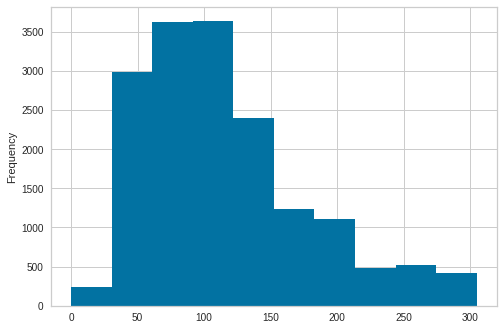

In [ ]:
# Dataset con outliers imputados
df['Price'].plot(kind='hist')

### Enriquecimiento

In [ ]:
!pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Dado que el pytrends no permite buscar datos para todo el periodo analizado, se decide no incorporar más datos. Se sobreentiende que al unir el dataset original con el extra, ya es más que suficiente como para enriquecer el analisis

### Validación

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16658 entries, 0 to 16657
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16658 non-null  object 
 1   name                            16645 non-null  object 
 2   host_id                         16658 non-null  int64  
 3   host_name                       16647 non-null  object 
 4   neighbourhood_group             16658 non-null  object 
 5   neighbourhood                   16658 non-null  object 
 6   latitude                        16658 non-null  float64
 7   longitude                       16658 non-null  float64
 8   room_type                       16658 non-null  object 
 9   minimum_nights                  16658 non-null  int64  
 10  number_of_reviews               16658 non-null  int64  
 11  last_review                     16658 non-null  object 
 12  reviews_per_month               

In [ ]:
df.shape

(16658, 64)

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Transit', 'House Rules',
       'Host Since', 'Host Location', 'Host About', 'Host Response Time',
       'Host Response Rate', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City',
       'State', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Availability 365',
       'Number of Reviews', 'First Review', 'Review Scores Rating',
       'Review S

In [ ]:
df[['Price','Cleaning Fee','Security Deposit']].describe()

Price  Cleaning Fee  Security Deposit
count  16658.000000  16658.000000      16658.000000
mean     116.188198     38.309701        103.536559
std       61.692612     38.301717        154.872185
min        0.000000      0.000000          0.000000
25%       70.000000      0.000000          0.000000
50%      100.000000     30.000000          0.000000
75%      150.000000     60.000000        200.000000
max      305.000000    160.000000        500.000000

##**Análisis exploratorio de datos (EDA)**

### Datos categóricos

In [ ]:
# Para saber cómo manejar los datos, buscamos los valores unicos en las columnas de interes que sean del tipo categóricas
df.neighbourhood_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
df.neighbourhood.unique()

array(['Midtown', 'Harlem', 'Clinton Hill', 'Murray Hill',
       'Bedford-Stuyvesant', "Hell's Kitchen", 'Upper West Side',
       'South Slope', 'Williamsburg', 'Fort Greene', 'Chelsea',
       'Park Slope', 'Inwood', 'East Village', 'Bushwick', 'Flatbush',
       'Lower East Side', 'Long Island City', 'Greenpoint', 'Kips Bay',
       'Upper East Side', 'Prospect Heights', 'East Harlem',
       'Washington Heights', 'Brooklyn Heights', 'Carroll Gardens',
       'West Village', 'Gowanus', 'Prospect-Lefferts Gardens',
       'Flatlands', 'Cobble Hill', 'Boerum Hill', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Windsor Terrace',
       'Roosevelt Island', 'SoHo', 'Little Italy', 'Chinatown',
       'East Flatbush', 'Tompkinsville', 'Astoria', 'Kensington',
       'Clason Point', 'Eastchester', 'Crown Heights', 'Two Bridges',
       'Queen

In [ ]:
df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [ ]:
# Dado que el nombre de los alojamientos es más complejo y
# varia uno a otro, se hará un analisis de las palabras incluidas en el mismo

# Primero se crea una lista vacia
_names_=[]
# Se obtienen las cadenas de nombres y se agregan a la lista
for name in df.name:
    _names_.append(name)
# Se crea una una función que dividirá las cadenas de nombres en palabras separadas  
def split_name(name):
    separado =str(name).split()
    return separado
# Se crea una lista vacía donde se contarán a contar las palabras
_names_for_count_=[]
# Se obtiene la cadena de nombre de la lista y se utiliza la función de división para luego agregar a la lista anterior
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

In [ ]:
from collections import Counter
# Se mostrarán las 30 palabras principales usadas por el anfitrion para nombrar su alojamieno
_top_30_w=Counter(_names_for_count_).most_common()
_top_30_w=_top_30_w[0:30]
_top_30_w

[('in', 5821),
 ('room', 3240),
 ('bedroom', 2406),
 ('private', 2285),
 ('apartment', 1908),
 ('apt', 1507),
 ('cozy', 1498),
 ('1', 1327),
 ('studio', 1262),
 ('spacious', 1251),
 ('brooklyn', 1191),
 ('east', 1079),
 ('sunny', 1076),
 ('the', 1040),
 ('2', 972),
 ('to', 971),
 ('park', 963),
 ('&', 921),
 ('williamsburg', 902),
 ('with', 897),
 ('and', 882),
 ('of', 862),
 ('village', 838),
 ('beautiful', 826),
 ('manhattan', 804),
 ('-', 765),
 ('large', 760),
 ('loft', 706),
 ('near', 705),
 ('nyc', 608)]

In [ ]:
# Se crea un dataframe con los datos hallados
sub_w=pd.DataFrame(_top_30_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

[Text(0, 0, 'in'),
 Text(0, 0, 'room'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'private'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'cozy'),
 Text(0, 0, '1'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'spacious'),
 Text(0, 0, 'brooklyn'),
 Text(0, 0, 'east'),
 Text(0, 0, 'sunny'),
 Text(0, 0, 'the'),
 Text(0, 0, '2'),
 Text(0, 0, 'to'),
 Text(0, 0, 'park'),
 Text(0, 0, '&'),
 Text(0, 0, 'williamsburg'),
 Text(0, 0, 'with'),
 Text(0, 0, 'and'),
 Text(0, 0, 'of'),
 Text(0, 0, 'village'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'manhattan'),
 Text(0, 0, '-'),
 Text(0, 0, 'large'),
 Text(0, 0, 'loft'),
 Text(0, 0, 'near'),
 Text(0, 0, 'nyc')]

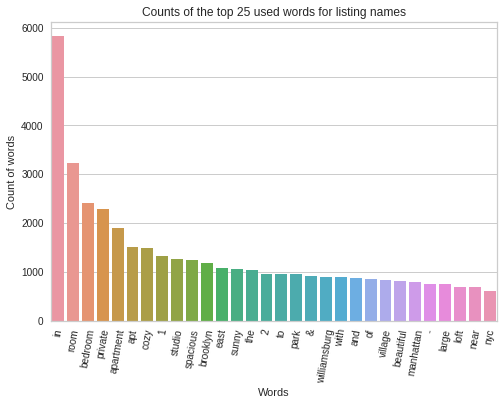

In [ ]:
# Se vizualiza en un grafico de frecuencia
sub_name_graf=sns.barplot(x='Words', y='Count', data=sub_w)
sub_name_graf.set_title('Counts of the top 25 used words for listing names')
sub_name_graf.set_ylabel('Count of words')
sub_name_graf.set_xlabel('Words')
sub_name_graf.set_xticklabels(sub_name_graf.get_xticklabels(), rotation=80)

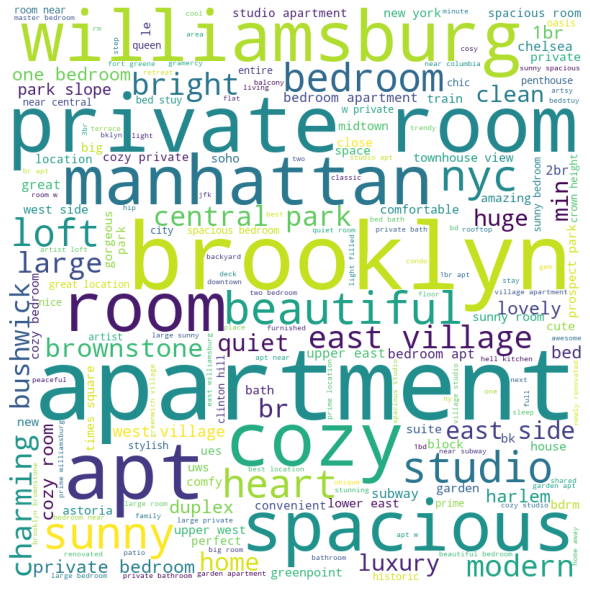

In [ ]:
# importacion de modulos especificos de la libreria
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)

# seleccionar la columna bajo estudio
for val in df.name:
	
	# cambiar todo a str
	val = str(val)

	# separar cada valor
	tokens = val.split()
	
	# convertir los tokens en minusculas
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# devolver la imagen con la nube de palabras					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


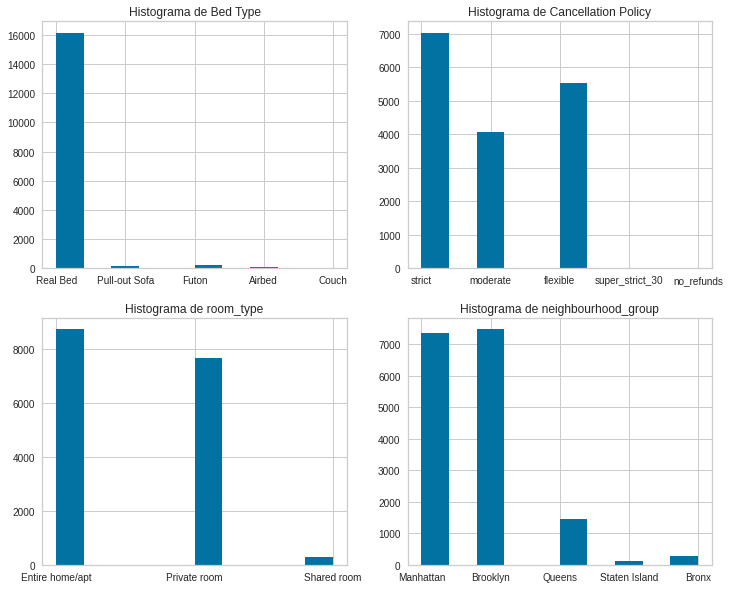

In [ ]:
plt.figure(figsize=(12,10))
vars_to_plot = ['Bed Type', 'Cancellation Policy','room_type','neighbourhood_group']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,2,i+1) # 2 filas dos columnas 
    plt.hist(df[var],10) # 10 representa el numero de bins 
    title_string = "Histograma de " + var 
    plt.title(title_string)

### Datos numéricos

In [ ]:
# Para empezar a conocer los datos numéricos, se muestra los datos descriptivos
df[['reviews_per_month', 'Host Response Rate', 'Host Listings Count', 'Host Total Listings Count',
    'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Security Deposit', 'Cleaning Fee',
    'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 365',
    'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness',
    'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value',
    'Calculated host listings count']].describe()

reviews_per_month  Host Response Rate  Host Listings Count  \
count       16658.000000        16658.000000         16553.000000   
mean            0.886225           55.165026             2.119918   
std             1.332089           47.968972            13.451709   
min             0.000000            0.000000             0.000000   
25%             0.040000            0.000000             1.000000   
50%             0.250000           90.000000             1.000000   
75%             1.250000          100.000000             2.000000   
max            16.220000          100.000000           855.000000   

       Host Total Listings Count  Accommodates     Bathrooms      Bedrooms  \
count               16553.000000  16658.000000  16582.000000  16619.000000   
mean                    2.119918      2.791151      1.123598      1.152837   
std                    13.451709      1.773790      0.382975      0.705266   
min                     0.000000      1.000000      0.000000      0.000000   
25%                     1.000000      2.000000      1.000000      1.000000   
50%                     1.000000      2.000000      1.000000      1.000000   
75%                     2.000000      4.000000      1.000000      1.000000   
max                   855.000000     16.000000      8.000000     10.000000   

               Beds         Price  Security Deposit  ...  Availability 365  \
count  16632.000000  16658.000000      16658.000000  ...      16658.000000   
mean       1.528920    116.188198        103.536559  ...        113.013027   
std        1.018383     61.692612        154.872185  ...        135.604821   
min        1.000000      0.000000          0.000000  ...          0.000000   
25%        1.000000     70.000000          0.000000  ...          0.000000   
50%        1.000000    100.000000          0.000000  ...         31.000000   
75%        2.000000    150.000000        200.000000  ...        250.000000   
max       16.000000    305.000000        500.000000  ...        365.000000   

       Number of Reviews  Review Scores Rating  Review Scores Accuracy  \
count       16658.000000          16658.000000            16658.000000   
mean           18.155601             72.131528                7.365830   
std            32.906088             40.054829                4.112124   
min             0.000000              0.000000                0.000000   
25%             1.000000             78.000000                8.000000   
50%             4.000000             93.000000               10.000000   
75%            20.000000             98.000000               10.000000   
max           432.000000            100.000000               10.000000   

       Review Scores Cleanliness  Review Scores Checkin  \
count               16658.000000           16658.000000   
mean                    7.121683               7.483672   
std                     4.026585               4.165601   
min                     0.000000               0.000000   
25%                     6.000000               8.000000   
50%                     9.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       Review Scores Communication  Review Scores Location  \
count                 16658.000000            16658.000000   
mean                      7.525453                7.221455   
std                       4.167025                4.044835   
min                       0.000000                0.000000   
25%                       8.000000                8.000000   
50%                      10.000000                9.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       Review Scores Value  Calculated host listings count  
count         16658.000000                    16658.000000  
mean              7.210830                        1.621743  
std               4.040168            

#### Análisis univariado

Se presentan algunas medidas estadísticas relevantes

In [ ]:
from scipy import stats
# Media
stats.describe(df['Price'])

DescribeResult(nobs=16658, minmax=(0.0, 305.0), mean=116.1881978628887, variance=3805.978327411889, skewness=0.9376994111434984, kurtosis=0.41522882825210594)

In [ ]:
# Media recortada
stats.trim_mean(df['Price'],0.25)

104.61824729891957

In [ ]:
# Moda
stats.mode(df['Price'])

ModeResult(mode=array([100.]), count=array([1514]))

In [ ]:
# Cuartiles
np.percentile(df['Price'], [0,25,75,100])

array([  0.,  70., 150., 305.])

#### Barrios
Mapa NY.jpg

Text(0, 0.5, 'Frecuencia absoluta')

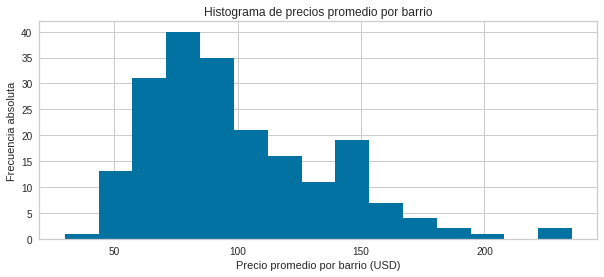

In [ ]:
# Se agrupan los valores de acuerdo al vecindario o barrio,
# haciendo el promedio por precio de cada barrio, se crea una serie automáticamente
precioxbarrio = df.groupby('neighbourhood').Price.mean() 

fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(precioxbarrio.values.flatten(),bins=15)
ax.set_title('Histograma de precios promedio por barrio')
ax.set_xlabel('Precio promedio por barrio (USD)')
ax.set_ylabel('Frecuencia absoluta')

In [ ]:
df_1=df[['id','neighbourhood_group']]
pie_barrio = df_1.groupby('neighbourhood_group').agg('count')
pie_barrio=pie_barrio.rename(columns={'id': 'Frecuencia'})
pie_barrio

Frecuencia
neighbourhood_group            
Bronx                       265
Brooklyn                   7473
Manhattan                  7346
Queens                     1463
Staten Island               111

Text(0.5, 1.0, 'Distribucion de barrios')

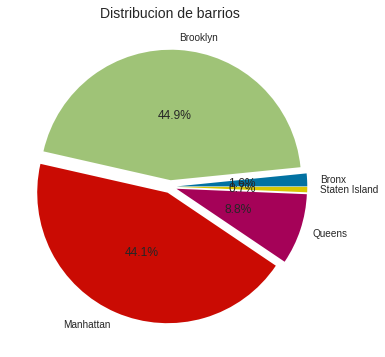

In [ ]:
labels = pie_barrio.index

pie, ax = plt.subplots(figsize=[10,6])
fig=plt.pie(x=pie_barrio, autopct="%.1f%%",labels=labels,explode=[0.05]*5,\
            pctdistance=0.5)
plt.title("Distribucion de barrios", fontsize=14)

#####Brooklyn
Es probablemente el segundo distrito más conocido de Nueva York por detrás de Manhattan.
Brooklyn ha sido el lugar de nacimiento de famosos artistas como Barbra Streisand, Eddie Murphy, Cyndi Lauper, Jennifer Connelly y Woody Allen.
Entre los deportistas más importantes merece la pena nombrar a Michael Jordan y Mike Tyson.


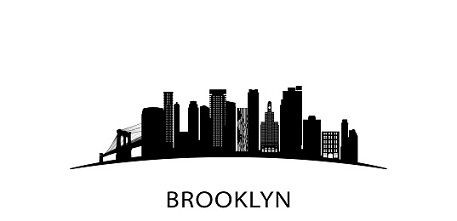

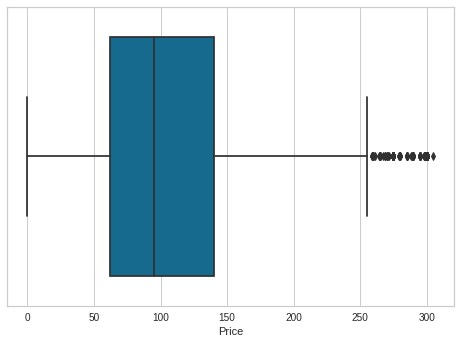

In [ ]:
sub_1=df.loc[df['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['Price']]

pd_price_sub1 = pd.DataFrame(df.loc[df['neighbourhood_group'] == 'Brooklyn'])
#pd_price_sub1
sns.boxplot(x= pd_price_sub1['Price'] )

##### Manhattan
Manhattan es el “borough” más famoso de Nueva York. Se trata del barrio más visitado de la ciudad, todo un icono, y es tan conocido que muchos confunden Nueva York con Manhattan.

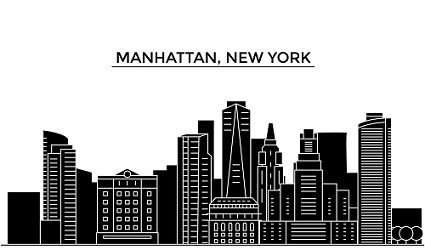

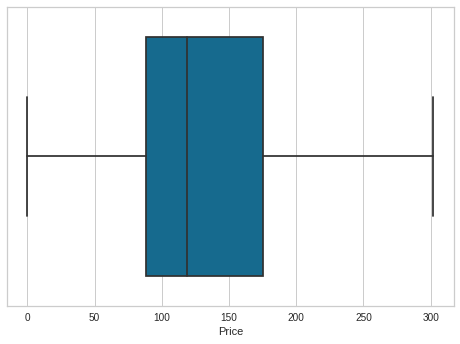

In [ ]:
sub_2=df.loc[df['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['Price']]

pd_price_sub2 = pd.DataFrame(df.loc[df['neighbourhood_group'] == 'Manhattan'])
sns.boxplot(x= pd_price_sub2['Price'] )

##### Queens
Es el distrito más grande de Nueva York y, aunque no es tan famoso, es el que más rápido está evolucionando.
La economía del distrito de Queens se basa en el arte, el turismo (en la zona se encuentran los aeropuertos JFK y LaGuardia) y el cine, una industria que, aunque estaba casi desaparecida en Nueva York, está renaciendo.

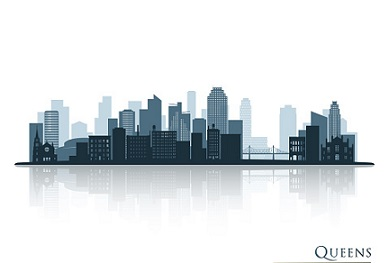


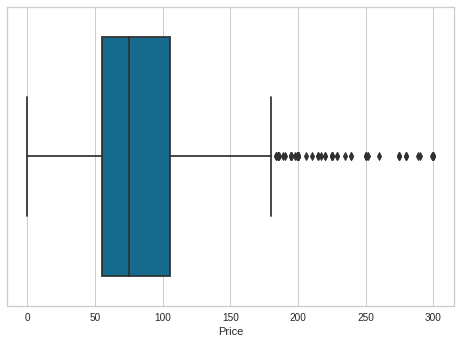

In [ ]:
sub_3=df.loc[df['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['Price']]

pd_price_sub3 = pd.DataFrame(df.loc[df['neighbourhood_group'] == 'Queens'])
sns.boxplot(x= pd_price_sub3['Price'] )

##### Staten Island
Es el distrito más meridional de Nueva York y el más desconocido para el público en general.
Staten Island, que solo está a 30 minutos de Manhattan, es el distrito más desconocido de Nueva York. Aunque no alberga atractivos turísticos a la altura de Manhattan, siempre hay algo que visitar en Staten Island.

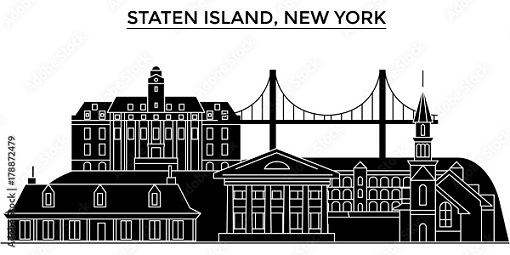

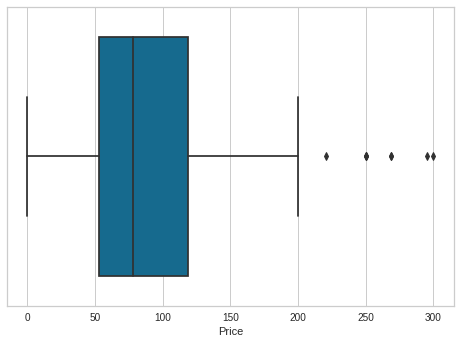

In [ ]:
sub_4=df.loc[df['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['Price']]

pd_price_sub4 = pd.DataFrame(df.loc[df['neighbourhood_group'] == 'Staten Island'])
sns.boxplot(x= pd_price_sub4['Price'] )

##### Bronx
El Bronx se encuentra separado de Manhattan por el río Harlem y es el único distrito de Nueva York que se encuentra en la parte continental del país.
Culturalmente hablando, el Bronx es la cuna del rap y del hip hop. En sus calles se hablan más de 75 lenguas distintas, aunque el inglés y el español predominan sobre el resto.

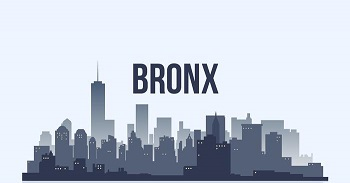


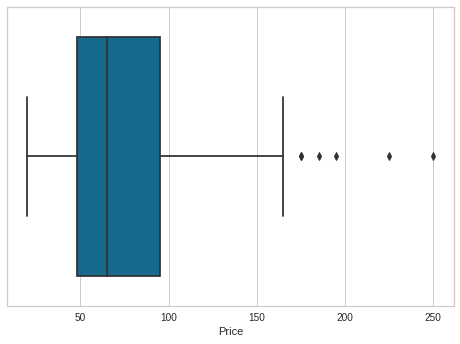

In [ ]:
sub_5=df.loc[df['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['Price']]

pd_price_sub5 = pd.DataFrame(df.loc[df['neighbourhood_group'] == 'Bronx'])
sns.boxplot(x= pd_price_sub5['Price'] )

In [ ]:
ax= sns.violinplot(data=df, x='neighbourhood_group', y='Price')
ax.set(xlabel= 'Barrio', ylabel = 'precio', title ='Distribución y densidad para cada grupo de barrio')

[Text(0, 0.5, 'precio'),
 Text(0.5, 0, 'Barrio'),
 Text(0.5, 1.0, 'Distribución y densidad para cada grupo de barrio')]

Se peude observar que la mayor cantidad de alojamientos tienen un precio que ronda los 50 y 100 USD para todos los barrios. Sin embargo, resulta evidente que en Manhattan hay alojamientos con precios mucho mas elevados (de los 125 USD en adelante) como sucede en Brooklyn también aunque en menor medida; pero en Bronx y Queens, los no suelen superar la barrera de los 150 USD

[Text(0, 0.5, 'precio'),
 Text(0.5, 0, 'Barrio'),
 Text(0.5, 1.0, 'Densidad por precios para cada grupo de barrio')]

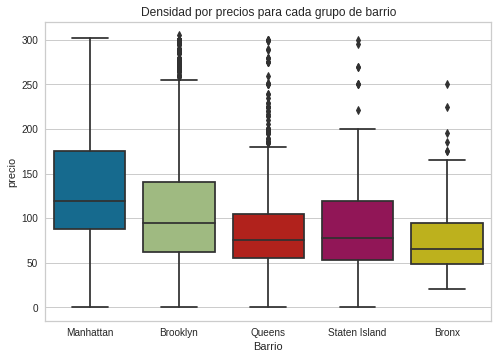

In [ ]:
ax = sns.boxplot(x='neighbourhood_group', y='Price', data = df) 
ax.set(xlabel= 'Barrio', ylabel = 'precio', title ='Densidad por precios para cada grupo de barrio')

Se puede reafirmar cómo los precios más altos estan en Manhattan que es el corazon de la ciudad de Nueva York
mientras los precios medios del barrio Bronx, Queens y Staten Island son los bajos 

### Datos categóricos y numéricos

#### Tipo de alojamiento

In [ ]:
plt.figure(figsize=(8,6))
graf3= sns.boxplot(x='neighbourhood_group', y='Price', hue= 'room_type',data = df) 
plt.title("Precios por grupo de barrio y tipo de alojamiento ", fontsize=20, verticalalignment='bottom');

Resulta notorio cómo los precios de los departamentos enteros tienen un precio más alto, salvo en Bronx ya que hay alojamientos compartidos que podrían tener un precio igual al alojamiento entero. 
Si bien, los prcecios de los deparamentos/casas enteros son más altos que los demás, no se nota graficamnte una tendencia de que las habitaciones priadas sean más caras que las habitaciones compartidas. 

####  Composición

A continuación, se presenta un gráfico que relaciona distintos componentes de los alojamientos y se llega a conclusiones particulares de cada caso

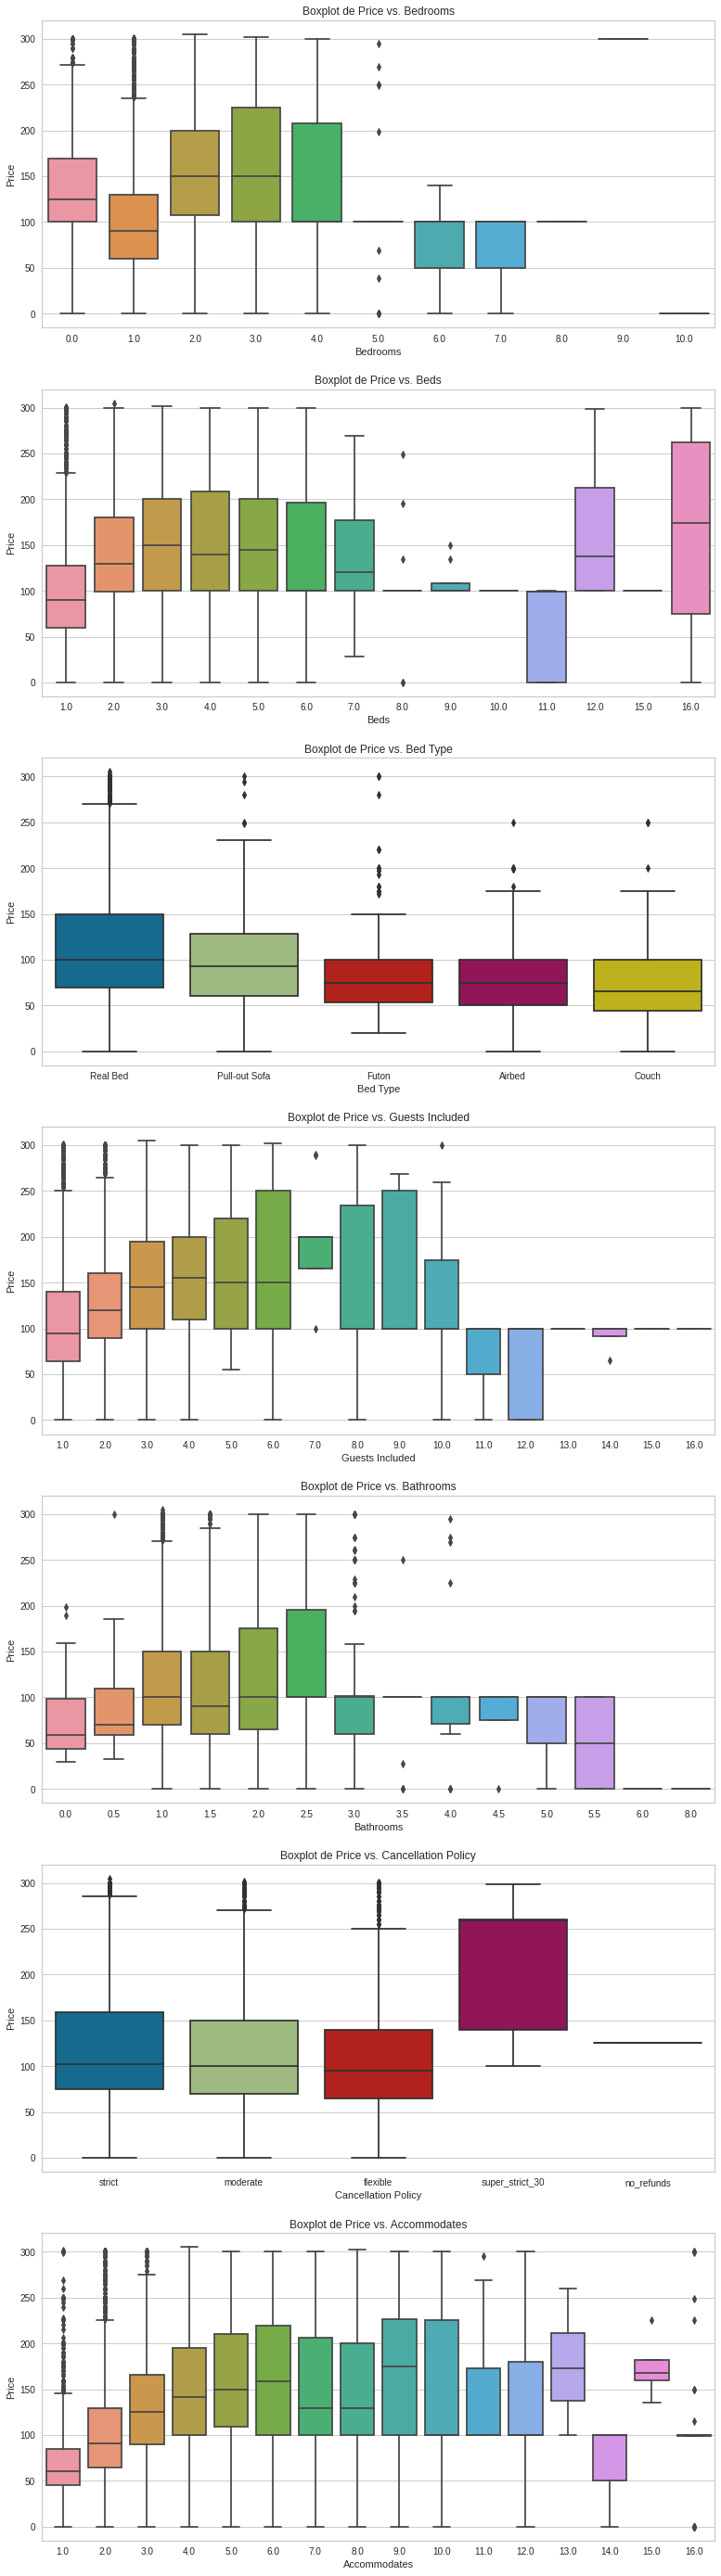

In [ ]:
plt.figure(figsize=(13,50))
vars_to_plot = ['Bedrooms','Beds','Bed Type','Guests Included','Bathrooms','Cancellation Policy','Accommodates']
for i, var in enumerate(vars_to_plot):
    plt.subplot(7,1,i+1) # Figura 2 filas y 2 columnas
    sns.boxplot(x = var, y='Price', data = df)
    title_string = "Boxplot de Price vs. " + var # titulo iterativo
    plt.ylabel("Price")
    plt.title(title_string)

Relación precio - habitaciones: se nota que hay outliers como los alojamientos de 8, 9 o 10 habitaciones y se observa que a medida que aumenta la cantida de habitaciones (de 1 a 4), el precio se eleva. Pareciera que los alojamientos que no tienen ningua habitación tienen un precio mayor al que tienen una sola pero se corrobora en el gráfico siguiente para chequera si esta situación se debe a que el precio de monoambientes puede ser elevado por tratarse de alojamientos enteros.

Relación precio - camas: El comportamiento del precio tiene un aparente comportamiento creciente de 1 a 4 camas y luego comienza a decrecer sin contemplar los de 10 camas en adelante.
Esta situación tiene lógica ya que suele abaratarse el costo de alojamiento a medida que van más viajeros.

Relación precio - tipo de cama: puede observarse que exite un leve aumento del precio dependiendo de la comodidad de la cama. Por ello la cama normal tiene los precios más alto, le sigue el sofa cama y por úlitmo, todos los tipos de futones y camas cuchetas 

Relación precio - huespedes incluidos:El comportamiento del precio se mueve de forma similar a la canitdad de camas con el mismo razonamiento de que se abaratan los costos al compartir con más personas el gasto total del alojamiento. 
Lo mismo aplica para la relación precio-personas alojadas

Relación precio - baños: comportamiento similar al de huespedes incluidos y cantidad de camas.

Relación precio - política de cancelación: evidentemente los hospedadores menos adversos al riesgo que conservan una política muy estricta de cancelación, son los que tienen mayores precios.

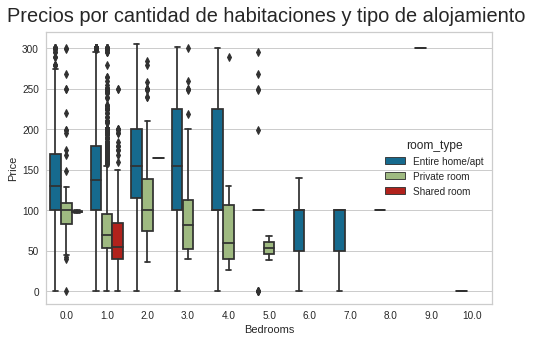

In [ ]:
plt.figure(figsize=(8,5))
graf3= sns.boxplot(x='Bedrooms', y='Price', hue= 'room_type',data = df) 
plt.title("Precios por cantidad de habitaciones y tipo de alojamiento ", fontsize=20, verticalalignment='bottom');

#### Reseñas

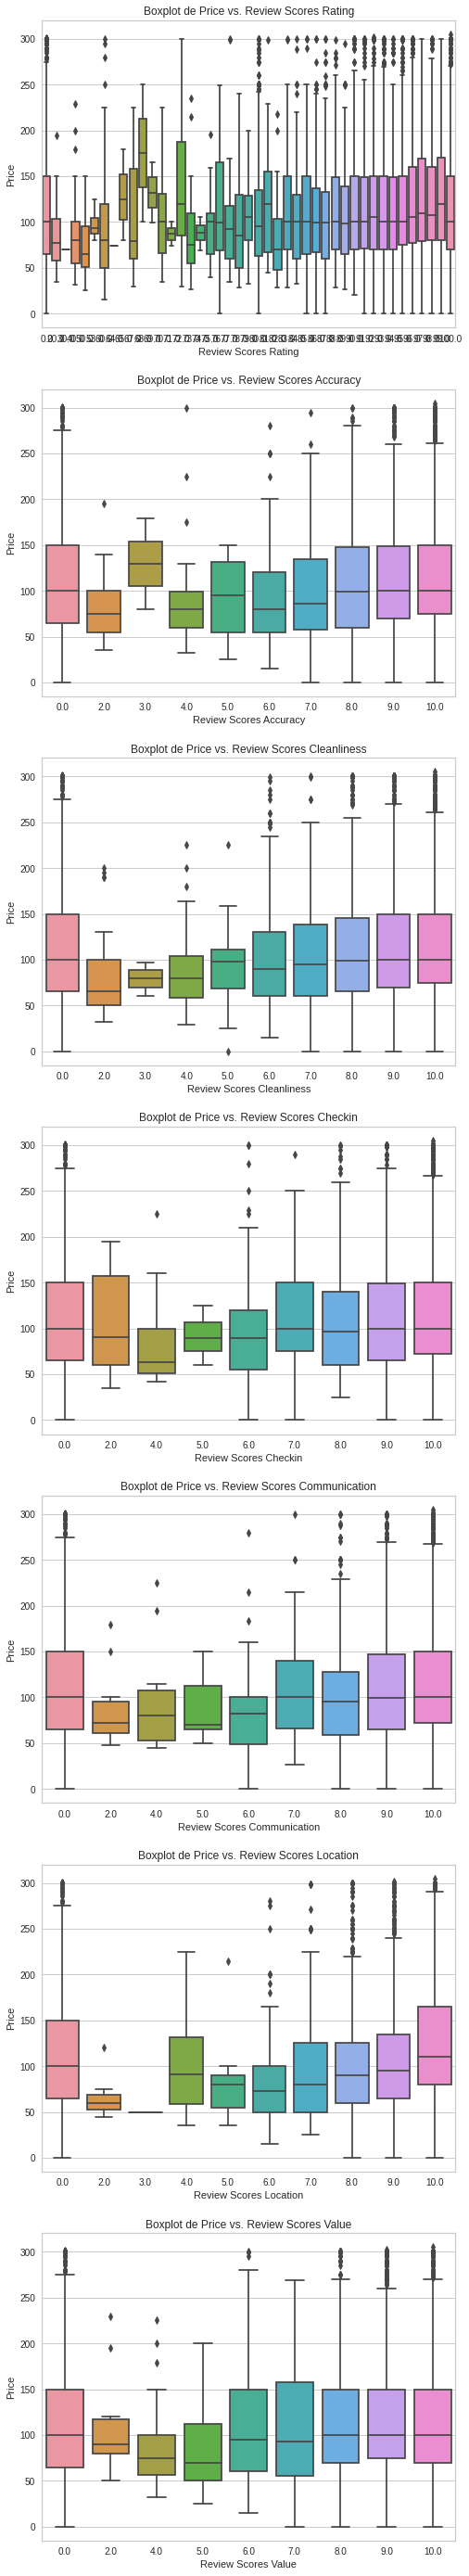

In [ ]:
plt.figure(figsize=(8,50))
vars_to_plot = ['Review Scores Rating','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value']
for i, var in enumerate(vars_to_plot):
    plt.subplot(7,1,i+1) # Figura 2 filas y 2 columnas
    sns.boxplot(x = var, y='Price', data = df)
    title_string = "Boxplot de Price vs. " + var # titulo iterativo
    plt.ylabel("Price")
    plt.title(title_string)

Las relaciones entre precio y valoración de los viajeros que ya se hospedaron en cada alojamiento, no presentan tendencias marcadas salvo por la de ubicación geográfica y limpieza. Comunmente, los turistas se enfocan en alquilar un lugar para dormir sin más y quieren tener una buena ubicación para aprovechar al máximo su experiencia en la ciudad. Por esta razón es que los viajeros, deben prestar más atencion a estos 2 factores y lo puntuan de forma objetiva. Esto quiere decir que el resto de las valoraciones podrían estar afectadas por cuestiones subjetivas.

#### Hospedador

Text(0.5, 1.0, 'Boxplot de Price vs. Tiempo de respuesta')

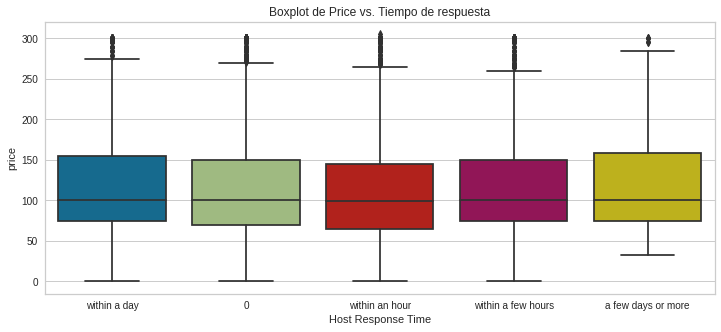

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Host Response Time',y= 'Price', data = df)
plt.ylabel("price")
plt.title("Boxplot de Price vs. Tiempo de respuesta")

Text(0.5, 1.0, 'Boxplot de Price vs. puntuaicon del hospedador')

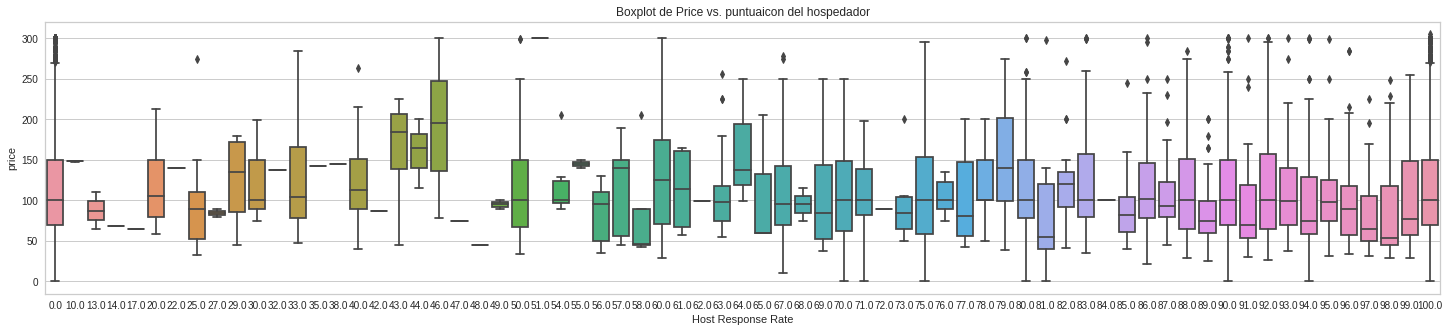

In [ ]:
plt.figure(figsize=(25,5))
sns.boxplot(x='Host Response Rate',y= 'Price', data = df)
plt.ylabel("price")
plt.title("Boxplot de Price vs. puntuaicon del hospedador")

A simple vista, pareciera que ni el tiempo de respuesta ni la puntuacióndel hosperador no influyera en el precio

### Datos espaciales

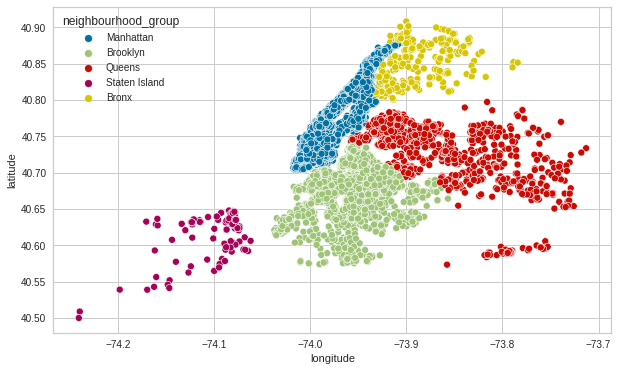

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

In [ ]:
import folium  #needed for interactive map
from folium.plugins import HeatMap

Importamos la libería folium que nos permite hacer visualizaciones sobre mapas de openstreetview
A continuación haremo un mapa de calor para entender donde son los mayores precios de los alquileres

In [ ]:
max_amount = float(df['Price'].max())

folium_hmap = folium.Map(location=[40.738, -73.98],
                        zoom_start=12,
                        tiles="OpenStreetMap")

hm_wide = HeatMap( list(zip(df['latitude'], df['longitude'], df['Price'])),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=8, blur=6, 
                   max_zoom=15, 
                 )

folium_hmap.add_child(hm_wide)

Haciendo una comparación entre los dos mapas el de calor y la ubicación del grupo de vecindarios se puede ver que los barrios de los precios más altos son los de la zona suroeste de Manhattan

In [ ]:
df.groupby('neighbourhood_group').id.count()

neighbourhood_group
Bronx             265
Brooklyn         7473
Manhattan        7346
Queens           1463
Staten Island     111
Name: id, dtype: int64

In [ ]:
lat_log_neigh_bronx = df.loc[ df['neighbourhood_group']=='Bronx', ["latitude","longitude" ] ]
lat_log_neigh_brooklyn = df.loc[ df['neighbourhood_group']=='Brooklyn', ["latitude","longitude" ] ]
lat_log_neigh_manhattan = df.loc[ df['neighbourhood_group']=='Manhattan', ["latitude","longitude" ] ]
lat_log_neigh_queens  = df.loc[ df['neighbourhood_group']=='Queens', ["latitude","longitude" ] ]
lat_log_neigh_staten  = df.loc[ df['neighbourhood_group']=='Staten Island', ["latitude","longitude" ] ]

folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=11,
                        tiles="OpenStreetMap")
for i in range(265):
    marker = folium.CircleMarker(location=[lat_log_neigh_bronx["latitude"].iloc[i],lat_log_neigh_bronx["longitude"].iloc[i]],\
                                 radius=1,color="blue",fill=True)
    marker.add_to(folium_map)

for i in range(7473):
    marker = folium.CircleMarker(location=[lat_log_neigh_brooklyn["latitude"].iloc[i],lat_log_neigh_brooklyn["longitude"].iloc[i]],\
                                 radius=1,color="red",fill=True)
    marker.add_to(folium_map)
for i in range(7346):
    marker = folium.CircleMarker(location=[lat_log_neigh_manhattan["latitude"].iloc[i],lat_log_neigh_manhattan["longitude"].iloc[i]],\
                                 radius=1,color="green",fill=True)
    marker.add_to(folium_map)
for i in range(1463):
    marker = folium.CircleMarker(location=[lat_log_neigh_queens["latitude"].iloc[i],lat_log_neigh_queens["longitude"].iloc[i]],\
                                 radius=1,color="yellow",fill=True)
    marker.add_to(folium_map)
for i in range(111):
    marker = folium.CircleMarker(location=[lat_log_neigh_staten["latitude"].iloc[i],lat_log_neigh_staten["longitude"].iloc[i]],\
                                 radius=1,color="orange",fill=True)
    marker.add_to(folium_map)

folium_map

In [ ]:
!pip install chart_studio
import chart_studio.plotly as py
import plotly.express as px
fig= px.density_heatmap(df, x='longitude', y='latitude',z= 'Price',
                        marginal_x= 'histogram',
                        marginal_y='histogram')
fig

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Analisis bivariado

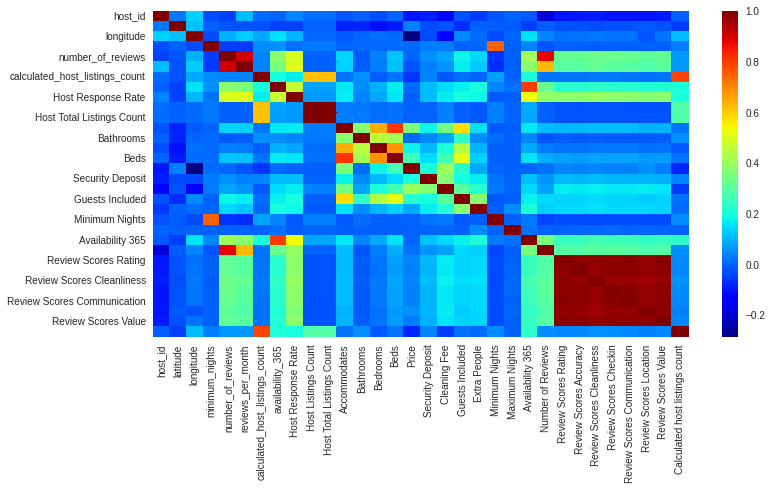

In [ ]:
# Correlaciones de pearson
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='jet')

Aparentemente hay regiones de mayor correlación en la zona que compara la composición del alojamiento en el centro, luego hay otra en las puntuaciones a los hospedadores en la zona inferior a la derecha. Luego, se nota que el precio no tendría alta correlacion con ninguna de las variables si solo miramos esa columna.

In [ ]:
corr = df.corr()
corr

host_id  latitude  longitude  minimum_nights  \
host_id                         1.000000  0.025200   0.136461       -0.028775   
latitude                        0.025200  1.000000   0.116243       -0.005764   
longitude                       0.136461  0.116243   1.000000       -0.026843   
minimum_nights                 -0.028775 -0.005764  -0.026843        1.000000   
number_of_reviews              -0.041176 -0.017393   0.094884       -0.047897   
reviews_per_month               0.110158 -0.021443   0.133660       -0.055347   
calculated_host_listings_count  0.006131 -0.025114   0.084922        0.052644   
availability_365               -0.003745 -0.044034   0.155883        0.056000   
Host Response Rate              0.042159 -0.044281   0.103840        0.014625   
Host Listings Count             0.010071 -0.001019   0.008866        0.027740   
Host Total Listings Count       0.010071 -0.001019   0.008866        0.027740   
Accommodates                   -0.016173 -0.084859  -0.014025        0.000142   
Bathrooms                      -0.001883 -0.076804   0.001602        0.006438   
Bedrooms                       -0.030329 -0.106812   0.018270        0.008620   
Beds                            0.000452 -0.093440   0.006098        0.009824   
Price                          -0.098485  0.034864  -0.287449        0.008918   
Security Deposit               -0.087629 -0.028481  -0.034449        0.030871   
Cleaning Fee                   -0.118851 -0.021748  -0.136396        0.034195   
Guests Included                -0.025187 -0.068893   0.044700       -0.004160   
Extra People                   -0.053487 -0.003487   0.009381       -0.000762   
Minimum Nights                 -0.022552 -0.010638  -0.031379        0.749656   
Maximum Nights                  0.003440 -0.009761   0.001654       -0.001867   
Availability 365               -0.015669 -0.046531   0.157972        0.040178   
Number of Reviews              -0.183822 -0.009645   0.043636       -0.022931   
Review Scores Rating           -0.098758 -0.025013   0.017802       -0.004428   
Review Scores Accuracy         -0.094851 -0.024716   0.021892       -0.004664   
Review Scores Cleanliness      -0.089095 -0.026093   0.026299       -0.009485   
Review Scores Checkin          -0.097767 -0.023432   0.022560       -0.004812   
Review Scores Communication    -0.100877 -0.024356   0.020745       -0.004276   
Review Scores Location         -0.097290 -0.012908  -0.015880       -0.001680   
Review Scores Value            -0.091986 -0.024376   0.023216       -0.004988   
Calculated host listings count -0.003939 -0.046248   0.113496        0.034081   

                                number_of_reviews  reviews_per_month  \
host_id                                 -0.041176           0.110158   
latitude                                -0.017393          -0.021443   
longitude                                0.094884           0.133660   
minimum_nights                          -0.047897          -0.055347   
number_of_reviews                        1.000000           0.905984   
reviews_per_month                        0.905984           1.000000   
calculated_host_listings_count           0.039494           0.043804   
availability_365                         0.382923           0.352022   
Host Response Rate                       0.500986           0.508461   
Host Listings Count                     -0.002439          -0.002439   
Host Total Listings Count               -0.002439          -0.002439   
Accommodates                             0.141583           0.136102   
Bathrooms                               -0.014002          -0.007522   
Bedrooms                                 0.038101           0.032555   
Beds                                     0.123048           0.118545   
Price                                    0.001601          -0.018582   
Security Deposit                         0.058750           0.037180   
Cleaning Fee                             0.080663           0.0

Otra manera de ver las correlaciones entre las distintas variables es a través del corr de PanDas que nos da una matriz de correlaciones y de esa manera podemos analizar el precio con todas las variables del dataframe

In [ ]:
corr    = df.corr()
pos_cor = corr['Price'] >0
neg_cor = corr['Price'] <0
corr['Price'][pos_cor].sort_values(ascending = False).round(2)

Price                          1.00
Cleaning Fee                   0.41
Accommodates                   0.36
Beds                           0.26
Guests Included                0.23
Security Deposit               0.20
Bedrooms                       0.18
Extra People                   0.09
Review Scores Location         0.06
Review Scores Cleanliness      0.04
Review Scores Rating           0.04
Review Scores Accuracy         0.04
Review Scores Checkin          0.04
Review Scores Communication    0.03
latitude                       0.03
Review Scores Value            0.03
Number of Reviews              0.02
Bathrooms                      0.01
minimum_nights                 0.01
availability_365               0.01
Minimum Nights                 0.00
Availability 365               0.00
number_of_reviews              0.00
Name: Price, dtype: float64

In [ ]:
corr['Price'][neg_cor].sort_values().round(2)

longitude                        -0.29
host_id                          -0.10
Calculated host listings count   -0.08
calculated_host_listings_count   -0.06
reviews_per_month                -0.02
Host Response Rate               -0.00
Maximum Nights                   -0.00
Host Listings Count              -0.00
Host Total Listings Count        -0.00
Name: Price, dtype: float64

Se encuentran correlaciones signifivativas con el precio respecto a la tarifa de limpieza, cantidad de lugares disponibles e incluidos, camas, habitatciones, visitantes extras, principalmente. 
También existe una correlación negativa de significatividad que tiene que ver con el formato geográfico de la ciudad. Esto se verá con mayor grado de detalle en la seccion de mapas

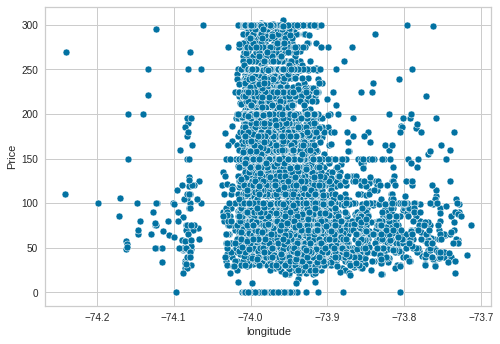

In [ ]:
sns.scatterplot(x= df['longitude'], y = df['Price'])

In [ ]:
# Análisis de la significancia de la correlación
from scipy.stats import pearsonr
import numpy as np
rho = df.corr()
rho

host_id  latitude  longitude  minimum_nights  \
host_id                         1.000000  0.025200   0.136461       -0.028775   
latitude                        0.025200  1.000000   0.116243       -0.005764   
longitude                       0.136461  0.116243   1.000000       -0.026843   
minimum_nights                 -0.028775 -0.005764  -0.026843        1.000000   
number_of_reviews              -0.041176 -0.017393   0.094884       -0.047897   
reviews_per_month               0.110158 -0.021443   0.133660       -0.055347   
calculated_host_listings_count  0.006131 -0.025114   0.084922        0.052644   
availability_365               -0.003745 -0.044034   0.155883        0.056000   
Host Response Rate              0.042159 -0.044281   0.103840        0.014625   
Host Listings Count             0.010071 -0.001019   0.008866        0.027740   
Host Total Listings Count       0.010071 -0.001019   0.008866        0.027740   
Accommodates                   -0.016173 -0.084859  -0.014025        0.000142   
Bathrooms                      -0.001883 -0.076804   0.001602        0.006438   
Bedrooms                       -0.030329 -0.106812   0.018270        0.008620   
Beds                            0.000452 -0.093440   0.006098        0.009824   
Price                          -0.098485  0.034864  -0.287449        0.008918   
Security Deposit               -0.087629 -0.028481  -0.034449        0.030871   
Cleaning Fee                   -0.118851 -0.021748  -0.136396        0.034195   
Guests Included                -0.025187 -0.068893   0.044700       -0.004160   
Extra People                   -0.053487 -0.003487   0.009381       -0.000762   
Minimum Nights                 -0.022552 -0.010638  -0.031379        0.749656   
Maximum Nights                  0.003440 -0.009761   0.001654       -0.001867   
Availability 365               -0.015669 -0.046531   0.157972        0.040178   
Number of Reviews              -0.183822 -0.009645   0.043636       -0.022931   
Review Scores Rating           -0.098758 -0.025013   0.017802       -0.004428   
Review Scores Accuracy         -0.094851 -0.024716   0.021892       -0.004664   
Review Scores Cleanliness      -0.089095 -0.026093   0.026299       -0.009485   
Review Scores Checkin          -0.097767 -0.023432   0.022560       -0.004812   
Review Scores Communication    -0.100877 -0.024356   0.020745       -0.004276   
Review Scores Location         -0.097290 -0.012908  -0.015880       -0.001680   
Review Scores Value            -0.091986 -0.024376   0.023216       -0.004988   
Calculated host listings count -0.003939 -0.046248   0.113496        0.034081   

                                number_of_reviews  reviews_per_month  \
host_id                                 -0.041176           0.110158   
latitude                                -0.017393          -0.021443   
longitude                                0.094884           0.133660   
minimum_nights                          -0.047897          -0.055347   
number_of_reviews                        1.000000           0.905984   
reviews_per_month                        0.905984           1.000000   
calculated_host_listings_count           0.039494           0.043804   
availability_365                         0.382923           0.352022   
Host Response Rate                       0.500986           0.508461   
Host Listings Count                     -0.002439          -0.002439   
Host Total Listings Count               -0.002439          -0.002439   
Accommodates                             0.141583           0.136102   
Bathrooms                               -0.014002          -0.007522   
Bedrooms                                 0.038101           0.032555   
Beds                                     0.123048           0.118545   
Price                                    0.001601          -0.018582   
Security Deposit                         0.058750           0.037180   
Cleaning Fee                             0.080663           0.0

p es chico, la significancia es fuerte y si p es grande, la significancia es débil

In [ ]:
from scipy.stats import pearsonr
import numpy as np
rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape) # quitar de la diagonal los unos con np.eye
p = pval.applymap(lambda x: ''.join(['*' for t in [0.00001] if x<=t]))
rho.round(2).astype(str) + p

host_id latitude longitude minimum_nights  \
host_id                           1.0*     0.03     0.14*          -0.03   
latitude                          0.03     1.0*     0.12*          -0.01   
longitude                        0.14*    0.12*      1.0*          -0.03   
minimum_nights                   -0.03    -0.01     -0.03           1.0*   
number_of_reviews               -0.04*    -0.02     0.09*         -0.05*   
reviews_per_month                0.11*    -0.02     0.13*         -0.06*   
calculated_host_listings_count    0.01    -0.03     0.08*          0.05*   
availability_365                  -0.0   -0.04*     0.16*          0.06*   
Host Response Rate               0.04*   -0.04*      0.1*           0.01   
Host Listings Count               0.01     -0.0      0.01           0.03   
Host Total Listings Count         0.01     -0.0      0.01           0.03   
Accommodates                     -0.02   -0.08*     -0.01            0.0   
Bathrooms                         -0.0   -0.08*       0.0           0.01   
Bedrooms                         -0.03   -0.11*      0.02           0.01   
Beds                               0.0   -0.09*      0.01           0.01   
Price                            -0.1*    0.03*    -0.29*           0.01   
Security Deposit                -0.09*    -0.03    -0.03*           0.03   
Cleaning Fee                    -0.12*    -0.02    -0.14*           0.03   
Guests Included                  -0.03   -0.07*     0.04*           -0.0   
Extra People                    -0.05*     -0.0      0.01           -0.0   
Minimum Nights                   -0.02    -0.01     -0.03          0.75*   
Maximum Nights                     0.0    -0.01       0.0           -0.0   
Availability 365                 -0.02   -0.05*     0.16*          0.04*   
Number of Reviews               -0.18*    -0.01     0.04*          -0.02   
Review Scores Rating             -0.1*    -0.03      0.02           -0.0   
Review Scores Accuracy          -0.09*    -0.02      0.02           -0.0   
Review Scores Cleanliness       -0.09*    -0.03      0.03          -0.01   
Review Scores Checkin            -0.1*    -0.02      0.02           -0.0   
Review Scores Communication      -0.1*    -0.02      0.02           -0.0   
Review Scores Location           -0.1*    -0.01     -0.02           -0.0   
Review Scores Value             -0.09*    -0.02      0.02           -0.0   
Calculated host listings count    -0.0   -0.05*     0.11*           0.03   

                               number_of_reviews reviews_per_month  \
host_id                                   -0.04*             0.11*   
latitude                                   -0.02             -0.02   
longitude                                  0.09*             0.13*   
minimum_nights                            -0.05*            -0.06*   
number_of_reviews                           1.0*             0.91*   
reviews_per_month                          0.91*              1.0*   
calculated_host_listings_count             0.04*             0.04*   
availability_365                           0.38*             0.35*   
Host Response Rate                          0.5*             0.51*   
Host Listings Count                         -0.0              -0.0   
Host Total Listings Count                   -0.0              -0.0   
Accommodates                               0.14*             0.14*   
Bathrooms                                  -0.01             -0.01   
Bedrooms                                   0.04*              0.03   
Beds                                       0.12*             0.12*   
Price                                        0.0             -0.02   
Security Deposit                           0.06*             0.04*   
Cleaning Fee                               0.08*             0.06*   
Guests Included                            0.18*             0.17*   
Extra People                               0.15*             0.13*   
Minimum Nights                            -0.06*    

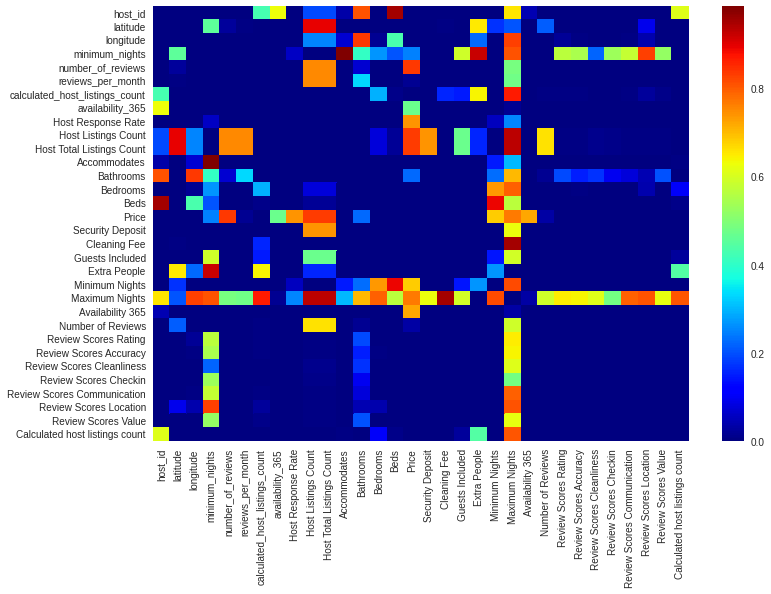

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(pval,cmap='jet')

Se demuestra que no hay correlación significativa con los datos del hospedador y sus ratings como así también, respecto a las reseñas de otros viajeros

In [ ]:
t= pd.crosstab(df.neighbourhood_group, df.room_type, normalize=True)*100

In [ ]:
t

room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                       0.570297      0.978509     0.042022
Brooklyn                   22.559731     21.671269     0.630328
Manhattan                  25.219114     18.051387     0.828431
Queens                      3.607876      5.012607     0.162084
Staten Island               0.348181      0.318165     0.000000

In [ ]:
from scipy.stats import chi2_contingency
# Chi-square test para independencia. 
c, p, dof, expected = chi2_contingency(t) 
# sacar el p valor
print(p)

0.9966674308078121


p valor relativamente grande por lo que hayevidencia de que se apoye la hipotesis nula. Por ende, el barrio y el tipo de alojamiento son variables independientes. Esta cuestión tambien se verifica con el coeficiente de Cramer. Se muestra a continuación en un gráfico en el que se ve que hay disintos tipos de alojamiento en todos los barrios 


In [ ]:
obs = np.sum(t).sum()
mini = min(t.shape)-1 
c/(obs*mini)

0.005987060035877269

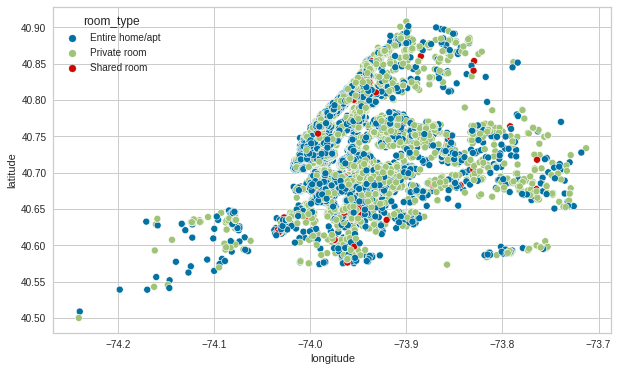

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.room_type)
plt.ioff()

In [ ]:
#Relacion entre precio y grupo de barrios
model1 = 'Price~neighbourhood_group'
lm1   = sm.ols(formula = model1, data = df).fit()
print(lm1.summary())

# como r2 es muy bajo como para establecer relaciones pero si éste fuera robusto, se diria que
# los precios de Manhattan son 59 USD más caros que los de Bronx y los de Brooklyn en 32 USD más elevados que los de Bronx
# Esta aproximación de conclusión, se asemeja a lo que se habia visto en el boxplot

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     296.1
Date:                Sun, 04 Dec 2022   Prob (F-statistic):          1.87e-246
Time:                        12:21:39   Log-Likelihood:                -91731.
No. Observations:               16658   AIC:                         1.835e+05
Df Residuals:                   16653   BIC:                         1.835e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [ ]:
model1_1 = 'Price~room_type'
lm1_1   = sm.ols(formula = model1_1, data = df).fit()
print(lm1_1.summary())

# r2 sigue siendo bajo como para establecer relaciones, pero si éste fuera robusto, se diria que
# los precios de los alojamientos enteros son 71 USD más caros que las habitaciones privadas y 
# 82 USD más levados que las habitaciones compartidas. Esto condice con la hipótesis planteada

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     4025.
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:21:39   Log-Likelihood:                -89019.
No. Observations:               16658   AIC:                         1.780e+05
Df Residuals:                   16655   BIC:                         1.781e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
df1 = df.rename(columns={'Bed Type':'Bed_Type', 'Guests Included':'Guests_Included',
                        'Cancellation Policy': 'Cancellation_Policy', 'Host Response Time': 'Host_Response_Time', 'Cleaning Fee' : 'Cleaning_Fee'})

In [ ]:
model1_2 = 'Price~ Bedrooms + Beds + Bathrooms + Accommodates + room_type + Bed_Type + Guests_Included + Cancellation_Policy + Cleaning_Fee'
lm1_2   = sm.ols(formula = model1_2, data = df1).fit()
print(lm1_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     609.4
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:21:39   Log-Likelihood:                -87768.
No. Observations:               16535   AIC:                         1.756e+05
Df Residuals:                   16518   BIC:                         1.757e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

# PARTE 2

##**Machine learning**

###Ingeniería de factores

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Transit', 'House Rules',
       'Host Since', 'Host Location', 'Host About', 'Host Response Time',
       'Host Response Rate', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City',
       'State', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Availability 365',
       'Number of Reviews', 'First Review', 'Review Scores Rating',
       'Review S

In [ ]:
#Se crea un dataframe de base para editar y trabajar con Machine Learning
mldf= df

In [ ]:
mldf.head(1)

id                   name  host_id host_name neighbourhood_group  \
0  2595  Skylit Midtown Castle     2845  Jennifer           Manhattan   

  neighbourhood  latitude  longitude        room_type  minimum_nights  ...  \
0       Midtown  40.75362  -73.98377  Entire home/apt               1  ...   

   Review Scores Accuracy Review Scores Cleanliness  Review Scores Checkin  \
0                     9.0                       9.0                    9.0   

   Review Scores Communication  Review Scores Location Review Scores Value  \
0                          9.0                    10.0                 9.0   

  Cancellation Policy Calculated host listings count  \
0              strict                            2.0   

                            Geolocation  \
0  40.75362072657246,-73.98377381114605   

                                            Features  
0  Host Has Profile Pic,Host Identity Verified,Re...  

[1 rows x 64 columns]

Variables a remover por tratarse de datos sensibles com IDs, nombres, descripciones o listas 

In [ ]:
mldf= mldf.drop(columns=['id', 'name', 'host_id', 'host_name', 'minimum_nights', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'Name', 'Summary',
       'Space', 'Description','Experiences Offered', 'Transit', 'House Rules','Host Location', 'Host About','Amenities','Host Verifications', 'Street',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed','Availability 365', 'First Review','Calculated host listings count','Features','Geolocation' ])

In [ ]:
mldf.head(1)

neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   

   number_of_reviews  Host Since Host Response Time  Host Response Rate  \
0                 45  2008-09-09       within a day                94.0   

   Host Listings Count  ...  Maximum Nights Number of Reviews  \
0                  3.0  ...          1125.0              20.0   

  Review Scores Rating Review Scores Accuracy Review Scores Cleanliness  \
0                 97.0                    9.0                       9.0   

   Review Scores Checkin  Review Scores Communication  Review Scores Location  \
0                    9.0                          9.0                    10.0   

   Review Scores Value Cancellation Policy  
0                  9.0              strict  

[1 rows x 36 columns]

####Feature creation

In [ ]:
mldf['neighbourhood_group'].value_counts() # One Hot Encoding

Brooklyn         7473
Manhattan        7346
Queens           1463
Bronx             265
Staten Island     111
Name: neighbourhood_group, dtype: int64

In [ ]:
mldf['neighbourhood'].value_counts()[0:30] # Reemplzar por otra categoria

Williamsburg                 1584
Bedford-Stuyvesant           1288
Harlem                       1053
Bushwick                      769
East Village                  763
Upper West Side               743
Crown Heights                 592
Upper East Side               590
Hell's Kitchen                493
Greenpoint                    440
East Harlem                   397
Chelsea                       396
Lower East Side               364
Midtown                       357
Washington Heights            340
Astoria                       324
West Village                  305
Clinton Hill                  259
Park Slope                    247
Flatbush                      245
Prospect-Lefferts Gardens     228
Fort Greene                   207
Prospect Heights              178
South Slope                   159
Long Island City              158
Morningside Heights           157
Chinatown                     147
Kips Bay                      146
Greenwich Village             141
Gramercy      

In [ ]:
mldf['room_type'].value_counts() # One Hot Encoding

Entire home/apt    8713
Private room       7668
Shared room         277
Name: room_type, dtype: int64

In [ ]:
mldf['City'].value_counts()[0:20] #Borrar porque se supone que todo es en NY

New York            7454
Brooklyn            7324
Queens              1006
Bronx                252
Staten Island        109
Astoria               93
Long Island City      41
Flushing              31
Ridgewood             21
Woodside              16
Jamaica               15
Jackson Heights       13
brooklyn              13
Elmhurst              12
Forest Hills           9
East Elmhurst          8
Rego Park              8
Sunnyside              8
bronx                  7
Corona                 7
Name: City, dtype: int64

In [ ]:
mldf['State'].value_counts() #Borrar se supone que todo es en el estado de NY

NY    16654
ny        3
MP        1
Name: State, dtype: int64

In [ ]:
mldf['Property Type'].value_counts() # Reemplzar por otra categoria

Apartment             14112
House                  1598
Loft                    349
Townhouse               239
Condominium             143
Other                    73
Bed & Breakfast          63
Timeshare                25
Boutique hotel           12
Hostel                   10
Guesthouse               10
Villa                     7
Bungalow                  5
Dorm                      3
Guest suite               2
Cabin                     2
Boat                      1
In-law                    1
Vacation home             1
Cave                      1
Serviced apartment        1
Name: Property Type, dtype: int64

In [ ]:
mldf['Room Type'].value_counts() #One Hot Encoding

Entire home/apt    8678
Private room       7681
Shared room         299
Name: Room Type, dtype: int64

In [ ]:
mldf['Bed Type'].value_counts() #One Hot Encoding

Real Bed         16132
Futon              207
Pull-out Sofa      166
Airbed             110
Couch               43
Name: Bed Type, dtype: int64

In [ ]:
mldf['Cancellation Policy'].value_counts() #One Hot Encoding

strict             7031
flexible           5536
moderate           4085
super_strict_30       5
no_refunds            1
Name: Cancellation Policy, dtype: int64

####Feature cleaning

In [ ]:
mldf=mldf.drop(columns=['State','City'])
mldf.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'number_of_reviews', 'Host Since', 'Host Response Time',
       'Host Response Rate', 'Host Listings Count',
       'Host Total Listings Count', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
OHE=['neighbourhood_group','room_type','Room Type','Bed Type','Cancellation Policy']
mldf_OHE=pd.get_dummies(mldf[OHE], columns = OHE)
mldf=mldf.drop(columns=['neighbourhood_group','room_type','Room Type','Bed Type','Cancellation Policy'])
mldf_OHE.head()

neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0                          0                             0   
1                          0                             0   
2                          0                             1   
3                          0                             0   
4                          0                             1   

   neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                              1                           0   
1                              1                           0   
2                              0                           0   
3                              1                           0   
4                              0                           0   

   neighbourhood_group_Staten Island  room_type_Entire home/apt  \
0                                  0                          1   
1                                  0                          0   
2                                  0                          1   
3                                  0                          1   
4                                  0                          0   

   room_type_Private room  room_type_Shared room  Room Type_Entire home/apt  \
0                       0                      0                          1   
1                       1                      0                          0   
2                       0                      0                          1   
3                       0                      0                          1   
4                       1                      0                          0   

   Room Type_Private room  ...  Bed Type_Airbed  Bed Type_Couch  \
0                       0  ...                0               0   
1                       1  ...                0               0   
2                       0  ...                0               0   
3                       0  ...                0               0   
4                       1  ...                0               0   

   Bed Type_Futon  Bed Type_Pull-out Sofa  Bed Type_Real Bed  \
0               0                       0                  1   
1               0                       1                  0   
2               0                       0                  1   
3               0                       0                  1   
4               1                       0                  0   

   Cancellation Policy_flexible  Cancellation Policy_moderate  \
0                             0                             0   
1                             0                             0   
2                             0                             1   
3                             0                             0   
4                             0                             0   

   Cancellation Policy_no_refunds  Cancellation Policy_strict  \
0                               0                           1   
1                               0                           1   
2                               0                           0   
3                               0                           1   
4                               0                           1   

   Cancellation Policy_super_strict_30  
0                                    0  
1                                    0  
2                                    0  
3                                    0  
4                                    0  

[5 rows x 21 columns]

####Feature transformation

In [ ]:
mldf['neighbourhood']=[x if x in mldf['neighbourhood'].value_counts()[0:50].index else 'Otro' for x in mldf['neighbourhood']]

In [ ]:
mldf['Property Type']=[x if x in mldf['Property Type'].value_counts()[0:6].index else 'Otro' for x in mldf['Property Type']]

In [ ]:
mldf.head(2)

neighbourhood  latitude  longitude  number_of_reviews  Host Since  \
0       Midtown  40.75362  -73.98377                 45  2008-09-09   
1        Harlem  40.80902  -73.94190                  0  2008-11-25   

  Host Response Time  Host Response Rate  Host Listings Count  \
0       within a day                94.0                  3.0   
1                  0                 0.0                  1.0   

   Host Total Listings Count Property Type  ...  Minimum Nights  \
0                        3.0     Apartment  ...             1.0   
1                        1.0     Apartment  ...             3.0   

   Maximum Nights  Number of Reviews  Review Scores Rating  \
0          1125.0               20.0                  97.0   
1             7.0                0.0                   0.0   

   Review Scores Accuracy  Review Scores Cleanliness  Review Scores Checkin  \
0                     9.0                        9.0                    9.0   
1                     0.0                        0.0                    0.0   

   Review Scores Communication  Review Scores Location  Review Scores Value  
0                          9.0                    10.0                  9.0  
1                          0.0                     0.0                  0.0  

[2 rows x 29 columns]

In [ ]:
# Concatenar las columnas
mldf_final= pd.concat([mldf_OHE, mldf],axis=1)
mldf_final.head(1)

neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0                          0                             0   

   neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                              1                           0   

   neighbourhood_group_Staten Island  room_type_Entire home/apt  \
0                                  0                          1   

   room_type_Private room  room_type_Shared room  Room Type_Entire home/apt  \
0                       0                      0                          1   

   Room Type_Private room  ...  Minimum Nights  Maximum Nights  \
0                       0  ...             1.0          1125.0   

   Number of Reviews  Review Scores Rating  Review Scores Accuracy  \
0               20.0                  97.0                     9.0   

   Review Scores Cleanliness  Review Scores Checkin  \
0                        9.0                    9.0   

   Review Scores Communication  Review Scores Location  Review Scores Value  
0                          9.0                    10.0                  9.0  

[1 rows x 50 columns]

####Outliers

In [ ]:
# Método: Standard Scaler
from sklearn.preprocessing import PowerTransformer
se= PowerTransformer(method='yeo-johnson')
col_num=['Price']
mldf_final[col_num]=se.fit_transform(mldf_final[col_num])
mldf_final.head()

neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0                          0                             0   
1                          0                             0   
2                          0                             1   
3                          0                             0   
4                          0                             1   

   neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                              1                           0   
1                              1                           0   
2                              0                           0   
3                              1                           0   
4                              0                           0   

   neighbourhood_group_Staten Island  room_type_Entire home/apt  \
0                                  0                          1   
1                                  0                          0   
2                                  0                          1   
3                                  0                          1   
4                                  0                          0   

   room_type_Private room  room_type_Shared room  Room Type_Entire home/apt  \
0                       0                      0                          1   
1                       1                      0                          0   
2                       0                      0                          1   
3                       0                      0                          1   
4                       1                      0                          0   

   Room Type_Private room  ...  Minimum Nights  Maximum Nights  \
0                       0  ...             1.0          1125.0   
1                       1  ...             3.0             7.0   
2                       0  ...             1.0           730.0   
3                       0  ...             2.0            21.0   
4                       1  ...             2.0           730.0   

   Number of Reviews  Review Scores Rating  Review Scores Accuracy  \
0               20.0                  97.0                     9.0   
1                0.0                   0.0                     0.0   
2              121.0                  90.0                     9.0   
3               60.0                  87.0                     9.0   
4               50.0                  90.0                     8.0   

   Review Scores Cleanliness  Review Scores Checkin  \
0                        9.0                    9.0   
1                        0.0                    0.0   
2                        9.0                   10.0   
3                        9.0                   10.0   
4                        8.0                   10.0   

   Review Scores Communication  Review Scores Location  Review Scores Value  
0                          9.0                    10.0                  9.0  
1                          0.0                     0.0                  0.0  
2                         10.0                     9.0                  9.0  
3                         10.0                     9.0                  9.0  
4                         10.0                     9.0                  9.0  

[5 rows x 50 columns]

(array([9.000e+01, 4.000e+00, 3.900e+01, 8.390e+02, 3.033e+03, 5.126e+03,
        2.668e+03, 2.428e+03, 1.492e+03, 9.390e+02]),
 array([-3.85118735, -3.2259418 , -2.60069624, -1.97545068, -1.35020512,
        -0.72495957, -0.09971401,  0.52553155,  1.1507771 ,  1.77602266,
         2.40126822]),
 <a list of 10 Patch objects>)

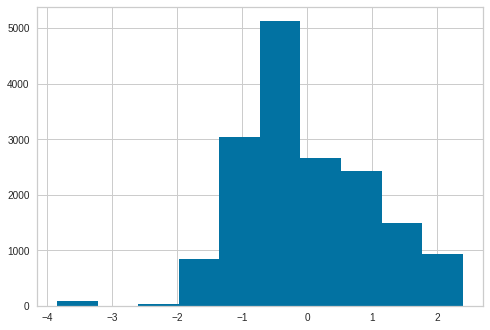

In [ ]:
plt.hist(mldf_final['Price'])

####Nulos

In [ ]:
mldf_final.isnull().sum()

neighbourhood_group_Bronx                0
neighbourhood_group_Brooklyn             0
neighbourhood_group_Manhattan            0
neighbourhood_group_Queens               0
neighbourhood_group_Staten Island        0
room_type_Entire home/apt                0
room_type_Private room                   0
room_type_Shared room                    0
Room Type_Entire home/apt                0
Room Type_Private room                   0
Room Type_Shared room                    0
Bed Type_Airbed                          0
Bed Type_Couch                           0
Bed Type_Futon                           0
Bed Type_Pull-out Sofa                   0
Bed Type_Real Bed                        0
Cancellation Policy_flexible             0
Cancellation Policy_moderate             0
Cancellation Policy_no_refunds           0
Cancellation Policy_strict               0
Cancellation Policy_super_strict_30      0
neighbourhood                            0
latitude                                 0
longitude  

In [ ]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fancyimpute import IterativeImputer
mice_impute = IterativeImputer()
traindatafill = mice_impute.fit_transform(mldf_final[['Bathrooms','Bedrooms','Beds']])
traindatafill= pd.DataFrame(traindatafill)
traindatafill.head(3)

0    1    2
0  1.0  0.0  1.0
1  1.0  1.0  1.0
2  1.0  1.0  3.0

In [ ]:
traindatafill.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [ ]:
# Reasignacion
mldf_final['Bathrooms']= traindatafill[0] 
mldf_final['Bedrooms']= traindatafill[1]
mldf_final['Beds']= traindatafill[2]
print(mldf_final.Bathrooms.isnull().sum())
print(mldf_final.Bedrooms.isnull().sum())
print(mldf_final.Beds.isnull().sum())

0
0
0


In [ ]:
mldf_final.isnull().sum()

neighbourhood_group_Bronx                0
neighbourhood_group_Brooklyn             0
neighbourhood_group_Manhattan            0
neighbourhood_group_Queens               0
neighbourhood_group_Staten Island        0
room_type_Entire home/apt                0
room_type_Private room                   0
room_type_Shared room                    0
Room Type_Entire home/apt                0
Room Type_Private room                   0
Room Type_Shared room                    0
Bed Type_Airbed                          0
Bed Type_Couch                           0
Bed Type_Futon                           0
Bed Type_Pull-out Sofa                   0
Bed Type_Real Bed                        0
Cancellation Policy_flexible             0
Cancellation Policy_moderate             0
Cancellation Policy_no_refunds           0
Cancellation Policy_strict               0
Cancellation Policy_super_strict_30      0
neighbourhood                            0
latitude                                 0
longitude  

In [ ]:
mldf_final= mldf_final.drop(columns=['Host Since', 'Host Listings Count', 'Host Total Listings Count'])

### Predicción

In [ ]:
mldf_final.info() #Se observa los tipos digramar las "X"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16658 entries, 0 to 16657
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   neighbourhood_group_Bronx            16658 non-null  uint8  
 1   neighbourhood_group_Brooklyn         16658 non-null  uint8  
 2   neighbourhood_group_Manhattan        16658 non-null  uint8  
 3   neighbourhood_group_Queens           16658 non-null  uint8  
 4   neighbourhood_group_Staten Island    16658 non-null  uint8  
 5   room_type_Entire home/apt            16658 non-null  uint8  
 6   room_type_Private room               16658 non-null  uint8  
 7   room_type_Shared room                16658 non-null  uint8  
 8   Room Type_Entire home/apt            16658 non-null  uint8  
 9   Room Type_Private room               16658 non-null  uint8  
 10  Room Type_Shared room                16658 non-null  uint8  
 11  Bed Type_Airbed             

In [ ]:
mldf_final.columns # Se lista las columnas para copair y pegar las columnas al armar las "X"

Index(['neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room',
       'Room Type_Entire home/apt', 'Room Type_Private room',
       'Room Type_Shared room', 'Bed Type_Airbed', 'Bed Type_Couch',
       'Bed Type_Futon', 'Bed Type_Pull-out Sofa', 'Bed Type_Real Bed',
       'Cancellation Policy_flexible', 'Cancellation Policy_moderate',
       'Cancellation Policy_no_refunds', 'Cancellation Policy_strict',
       'Cancellation Policy_super_strict_30', 'neighbourhood', 'latitude',
       'longitude', 'number_of_reviews', 'Host Response Time',
       'Host Response Rate', 'Property Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Number of Revie

In [ ]:
mldf_final= mldf_final.drop(columns=['neighbourhood'])

In [ ]:
mldf_final= mldf_final.drop(columns=['Host Response Time'])

In [ ]:
mldf_final= mldf_final.drop(columns=['Property Type'])

In [ ]:
from sklearn.model_selection import train_test_split
X=mldf_final[['neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room',
       'Room Type_Entire home/apt', 'Room Type_Private room',
       'Room Type_Shared room', 'Bed Type_Airbed', 'Bed Type_Couch',
       'Bed Type_Futon', 'Bed Type_Pull-out Sofa', 'Bed Type_Real Bed',
       'Cancellation Policy_flexible', 'Cancellation Policy_moderate',
       'Cancellation Policy_no_refunds', 'Cancellation Policy_strict',
       'Cancellation Policy_super_strict_30', 'latitude',
       'longitude', 'number_of_reviews', 
       'Host Response Rate', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value'
      ]]
y= mldf_final['Price'].astype('int64')

In [ ]:
A=X[['neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room',
       'Room Type_Entire home/apt', 'Room Type_Private room',
       'Room Type_Shared room', 'Bed Type_Airbed', 'Bed Type_Couch',
       'Bed Type_Futon', 'Bed Type_Pull-out Sofa', 'Bed Type_Real Bed',
       'Cancellation Policy_flexible', 'Cancellation Policy_moderate',
       'Cancellation Policy_no_refunds', 'Cancellation Policy_strict',
       'Cancellation Policy_super_strict_30', 'latitude',
       'longitude', 'number_of_reviews',
        'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value']] # Numericas

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.30, random_state=42)

In [ ]:
# Se procura normalizar todas las variables
cols_num=[x for x in X.columns]
from sklearn.preprocessing import PowerTransformer
ms = PowerTransformer()
X[cols_num] = ms.fit_transform(X[cols_num])
X.head()

neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0                  -0.127143                     -0.902003   
1                  -0.127143                     -0.902003   
2                  -0.127143                      1.108644   
3                  -0.127143                     -0.902003   
4                  -0.127143                      1.108644   

   neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                       1.125890                   -0.310293   
1                       1.125890                   -0.310293   
2                      -0.888186                   -0.310293   
3                       1.125890                   -0.310293   
4                      -0.888186                   -0.310293   

   neighbourhood_group_Staten Island  room_type_Entire home/apt  \
0                          -0.081903                   0.954911   
1                          -0.081903                  -1.047218   
2                          -0.081903                   0.954911   
3                          -0.081903                   0.954911   
4                          -0.081903                  -1.047218   

   room_type_Private room  room_type_Shared room  Room Type_Entire home/apt  \
0               -0.923552              -0.130038                   0.958940   
1                1.082776              -0.130038                  -1.042818   
2               -0.923552              -0.130038                   0.958940   
3               -0.923552              -0.130038                   0.958940   
4                1.082776              -0.130038                  -1.042818   

   Room Type_Private room  ...  Minimum Nights  Maximum Nights  \
0               -0.925003  ...       -1.226197        0.802036   
1                1.081077  ...        0.459635       -1.537291   
2               -0.925003  ...       -1.226197        0.506145   
3               -0.925003  ...       -0.115660       -1.210670   
4                1.081077  ...       -0.115660        0.506145   

   Number of Reviews  Review Scores Rating  Review Scores Accuracy  \
0           0.855394              0.612637                0.326004   
1          -1.365050             -1.806720               -1.772404   
2           1.745441              0.461221                0.326004   
3           1.422538              0.395813                0.326004   
4           1.333531              0.461221               -0.001792   

   Review Scores Cleanliness  Review Scores Checkin  \
0                   0.423791               0.277423   
1                  -1.737784              -1.783463   
2                   0.423791               0.623061   
3                   0.423791               0.623061   
4                   0.099637               0.623061   

   Review Scores Communication  Review Scores Location  Review Scores Value  
0                     0.261188                0.735573             0.389896  
1                    -1.794421               -1.761611            -1.761499  
2                     0.610522                0.385852             0.389896  
3                     0.610522                0.385852             0.389896  
4                     0.610522                0.385852             0.389896  

[5 rows x 43 columns]

*texto en cursiva*#### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(max_depth=6, random_state=42, n_estimators=30,criterion='gini')
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=30, random_state=42)

In [ ]:
# Obtener predicciones
y_pred= clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

          -3       0.00      0.00      0.00        29
          -2       0.00      0.00      0.00         5
          -1       0.73      0.19      0.30       738
           0       0.67      0.98      0.80      3274
           1       0.00      0.00      0.00       818
           2       0.00      0.00      0.00       134

    accuracy                           0.67      4998
   macro avg       0.23      0.20      0.18      4998
weighted avg       0.55      0.67      0.57      4998



El modelo tiene consistencia dado que los valores predecidos se encmarcan en el precio normalizado (entre -1 y 0).

La presición del modelo es buena a la hora de de predecir los precios para el intervalo 0:-1. 


La sensibilidad (recall) del modelo tiene coherenci que sea mayor para 0 porque si se vuelve al gráfico de precio normalizado tiene muchos mas valores para ese tramo (0).

Por lo tanto, el F1 score responde de forma satisfactoria en base al recall y presición

La exactitud (accuracy) del modelo es del 69% por lo que el modelo funciona bastane bien.



Significatividad de variables

In [ ]:
clf.feature_importances_

array([0.00212309, 0.01259158, 0.05602613, 0.01182805, 0.00070114,
       0.10993062, 0.0816403 , 0.01240436, 0.10122832, 0.07940212,
       0.01686404, 0.00114904, 0.00036693, 0.00097314, 0.00040128,
       0.00166235, 0.00075675, 0.00052025, 0.        , 0.00143133,
       0.        , 0.09620884, 0.12556715, 0.01091445, 0.0570804 ,
       0.01853596, 0.03053036, 0.01086632, 0.01153685, 0.04024529,
       0.01572835, 0.01169853, 0.02484436, 0.00697597, 0.01068201,
       0.00564171, 0.00211916, 0.00382912, 0.00310934, 0.00212681,
       0.0088357 , 0.00270865, 0.00215797, 0.00052053, 0.00344902,
       0.00069814, 0.00051314, 0.00063912, 0.00023591])

Text(0.5, 0, 'Random Forest Feature Importance')

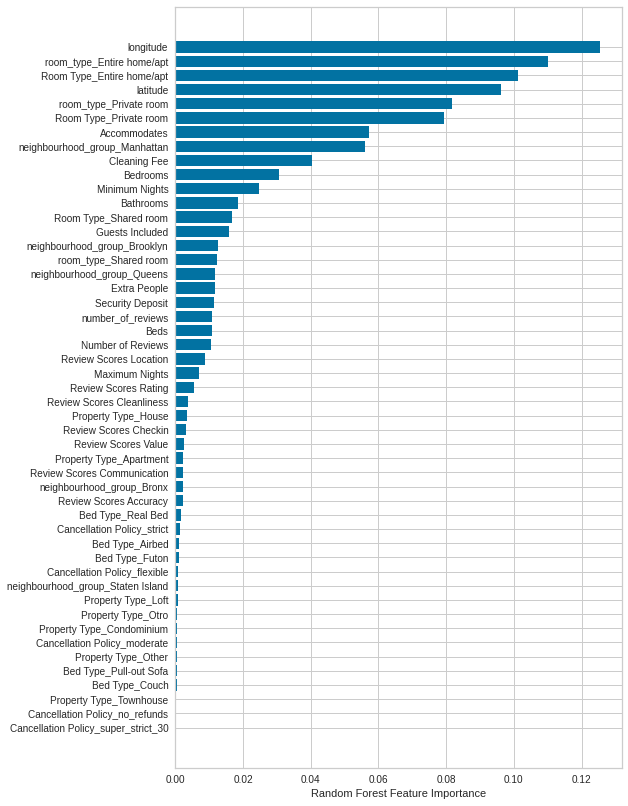

In [ ]:
sorted_idx = clf.feature_importances_.argsort()
plt.figure(figsize=(8,14))
plt.barh(X_train.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Como se planteó en los objetivos, se puede ver que una variable importante para definir el precio es la longitud que se vincula con la longitud - en mayor medida - por la forma de la ciudad de NY en el mapa y también con la latitud. Otras variables relevantes son si se trata de un alojamiento entero o privado que encarece el precio como así también la cantidad de huespedes que se puede alojar en cada propiedad. Por último, es importante remarcar que si la ubicación del alojamiento esta en Manhattan, el precio va a cambiar y se puede notar en los mapas de calor expuestos anteriormente.

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.36554621848739494


#####IsolationForest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# ajustar modelo
model = LinearRegression()
model.fit(X_train, y_train)
# obtener predicciones
yhat = model.predict(X_test)
# evaluar predicciones
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.441


In [ ]:
from sklearn.ensemble import IsolationForest
# identificar outliers en el dataset de train
iso = IsolationForest(contamination=0.1) # contamination = proporcion de outliers esperada
yhat = iso.fit_predict(X_train)
len(yhat[yhat==-1])

1166

In [ ]:
mldf_final.shape

(16658, 44)

In [ ]:
1166/16658

0.06999639812702606

In [ ]:
from sklearn.ensemble import IsolationForest
# identificar outliers en el dataset de train
iso = IsolationForest(contamination=0.1) # contamination = proporcion de outliers esperada
yhat = iso.fit_predict(X_train)
# seleccionar todas las filas que no son outliers
mask = yhat != -1 # filtro
X_train_i, y_train_i = X_train[mask, :], y_train[mask]
# Ajustar modelo
model = LinearRegression()
model.fit(X_train_i, y_train_i)
# evaluar el modelo
yhat_i = model.predict(X_test)
# evaluar predicciones
mae = mean_absolute_error(y_test, yhat_i)
print('MAE: %.3f' % mae) 

TypeError: ignored

##### Arbol de Decision

In [ ]:
#Arbol de Decision
from sklearn.tree import DecisionTreeClassifier 
arbol_de_decision = DecisionTreeClassifier(max_depth=4, random_state = 42) 

#Fit
arbol_de_decision.fit(X_train,y_train) #Entrenamos el modelo

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_score1 = arbol_de_decision.predict_proba(X_test)[:,1]
y_score1

In [ ]:
# Calculo de tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

####SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy con hyperparametros defecto: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Accuracy con hyperparametros defecto: 0.6551


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -3       0.00      0.00      0.00        29
          -2       0.00      0.00      0.00         5
          -1       0.00      0.00      0.00       738
           0       0.66      1.00      0.79      3274
           1       0.00      0.00      0.00       818
           2       0.00      0.00      0.00       134

    accuracy                           0.66      4998
   macro avg       0.11      0.17      0.13      4998
weighted avg       0.43      0.66      0.52      4998



#### Rducción dimensionalidad PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Se elimina las variables que menos explican el modelo segun Random forest anterior
mldf_PCA =  mldf_final.drop(columns =[ 'Room Type_Entire home/apt', 'Room Type_Private room',
       'Room Type_Shared room', 'Bed Type_Airbed', 'Bed Type_Couch',
       'Bed Type_Futon', 'Bed Type_Pull-out Sofa', 'Bed Type_Real Bed',
       'Cancellation Policy_flexible', 'Cancellation Policy_moderate',
       'Cancellation Policy_no_refunds', 'Cancellation Policy_strict',
       'Cancellation Policy_super_strict_30', 
       'number_of_reviews', 'Host Response Rate', 
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value'])

In [ ]:
mldf_PCA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16658 entries, 0 to 16657
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   neighbourhood_group_Bronx          16658 non-null  uint8  
 1   neighbourhood_group_Brooklyn       16658 non-null  uint8  
 2   neighbourhood_group_Manhattan      16658 non-null  uint8  
 3   neighbourhood_group_Queens         16658 non-null  uint8  
 4   neighbourhood_group_Staten Island  16658 non-null  uint8  
 5   room_type_Entire home/apt          16658 non-null  uint8  
 6   room_type_Private room             16658 non-null  uint8  
 7   room_type_Shared room              16658 non-null  uint8  
 8   latitude                           16658 non-null  float64
 9   longitude                          16658 non-null  float64
 10  Accommodates                       16658 non-null  float64
 11  Bathrooms                          16658 non-null  flo

In [ ]:
# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(mldf_PCA)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [ ]:
pca_pipe.fit(mldf_PCA)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [ ]:
modelo_pca.components_

array([[-4.42159800e-02,  1.50730047e-02,  3.39855619e-02,
        -7.61266600e-02,  3.32937812e-02,  3.99075977e-01,
        -3.89524321e-01, -4.04920821e-02, -5.64151355e-02,
        -1.21664938e-01,  4.10069439e-01,  1.76368705e-01,
         3.00774700e-01,  3.72148486e-01,  3.23428642e-01,
         1.83123080e-01,  3.04599072e-01],
       [-2.96267309e-02,  4.92820526e-01, -5.46527095e-01,
         9.58197371e-02,  3.48368047e-02, -1.26906588e-01,
         1.28218997e-01, -4.07796382e-03, -4.42300390e-01,
         2.02523747e-01,  1.26736007e-01,  1.88030771e-01,
         2.17032866e-01,  1.68111882e-01, -2.10700362e-01,
        -2.84674543e-02, -7.72546081e-02],
       [ 2.58891237e-01, -3.28082785e-01,  5.16427155e-02,
         4.14597743e-01, -1.50066333e-01, -1.14489976e-01,
         1.08783010e-01,  2.31801039e-02,  3.69622305e-01,
         4.66631550e-01,  2.05497309e-01,  2.23619499e-01,
         2.54166814e-01,  2.50350565e-01, -1.53026330e-01,
        -2.78610336e-02, -6.8

In [ ]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = mldf_PCA.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4' ,
               'PC5', 'PC6', 'PC7', 'PC8',
               'PC9', 'PC10', 'PC11', 'PC12' ,
               'PC13', 'PC14', 'PC15', 'PC16', 'PC17']
)

neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
PC1                   -0.044216                      0.015073   
PC2                   -0.029627                      0.492821   
PC3                    0.258891                     -0.328083   
PC4                   -0.058502                     -0.080231   
PC5                   -0.555447                     -0.277212   
PC6                    0.123682                     -0.023308   
PC7                    0.647011                     -0.060165   
PC8                    0.145856                     -0.037441   
PC9                   -0.000779                     -0.024918   
PC10                  -0.047859                      0.019098   
PC11                  -0.169489                      0.036098   
PC12                   0.085487                     -0.078277   
PC13                   0.299557                     -0.257344   
PC14                   0.093214                     -0.265671   
PC15                  -0.000069                      0.018498   
PC16                  -0.162032                     -0.644073   
PC17                   0.001078                      0.004284   

      neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
PC1                        0.033986                   -0.076127   
PC2                       -0.546527                    0.095820   
PC3                        0.051643                    0.414598   
PC4                        0.261540                   -0.371925   
PC5                        0.023231                    0.539414   
PC6                       -0.043756                    0.012008   
PC7                       -0.198602                   -0.009086   
PC8                       -0.027035                   -0.012927   
PC9                       -0.003911                    0.049750   
PC10                       0.055492                   -0.099072   
PC11                       0.099509                   -0.177184   
PC12                       0.047292                    0.047474   
PC13                       0.042560                    0.347959   
PC14                       0.391933                   -0.280450   
PC15                      -0.048593                    0.058482   
PC16                      -0.642977                   -0.366540   
PC17                       0.004277                    0.002438   

      neighbourhood_group_Staten Island  room_type_Entire home/apt  \
PC1                            0.033294                   0.399076   
PC2                            0.034837                  -0.126907   
PC3                           -0.150066                  -0.114490   
PC4                            0.278237                  -0.307975   
PC5                            0.530486                   0.006611   
PC6                            0.177529                   0.123395   
PC7                            0.616376                   0.129099   
PC8                            0.214531                  -0.225716   
PC9                            0.004316                   0.244865   
PC10                          -0.037130                   0.147868   
PC11                           0.049122                   0.200561   
PC12                          -0.106722                  -0.145080   
PC13                          -0.357779                   0.054113   
PC14                           0.064542                   0.008176   
PC15                          -0.019878                  -0.050843   
PC16                          -0.105358                  -0.004633   
PC17                           0.000701                  -0.696487   

      room_type_Private room  room_type_Shared room      latitude  \
PC1                -0.389524              -0.040492 -5.641514e-02   
PC2                 0.128219              -0.004078 -4.423004e-01   
PC3                 0.108783               0.023180  3.696223e-01   
PC4                 0.305861               0.010759  4.852183e-02   
PC5                 0.

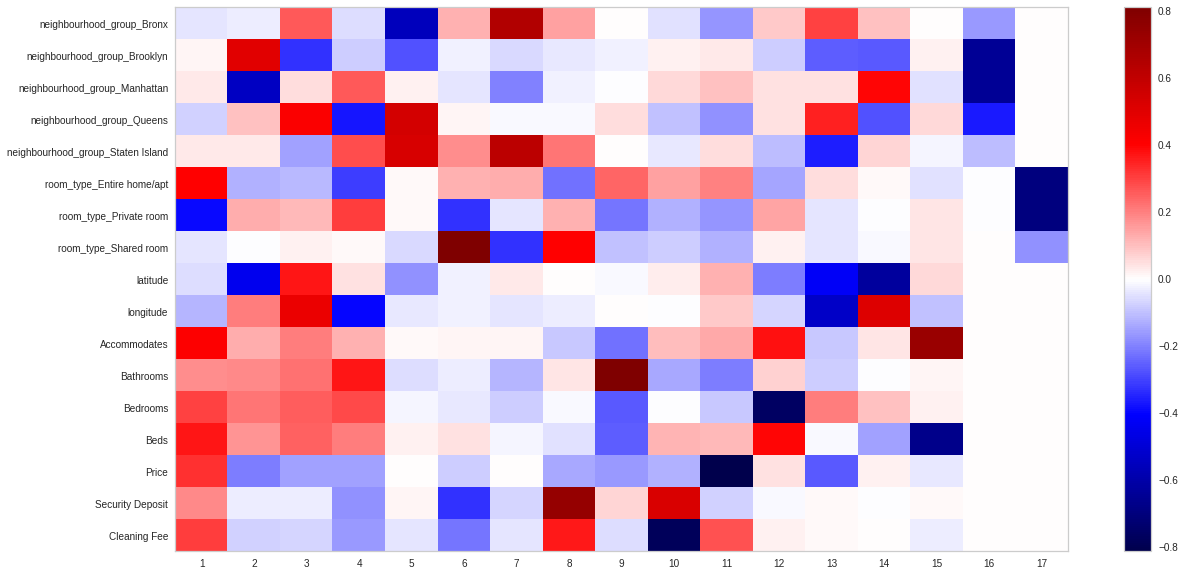

In [ ]:
# Heatmap componentes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='seismic', aspect='auto')
plt.yticks(range(len(mldf_PCA.columns)), mldf_PCA.columns)
plt.xticks(range(len(mldf_PCA.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

In [ ]:
modelo_pca.n_components_

17

<BarContainer object of 17 artists>

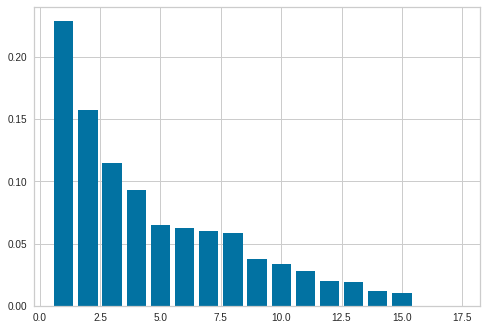

In [ ]:
plt.bar(x=np.arange(len(mldf_PCA.columns)) + 1,height=modelo_pca.explained_variance_ratio_)

Se requiere de muchas variables para explicar el modelo ya que el componente 1 y 2 apenas explican alrededor del 38%

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.22864366 0.38603304 0.50073686 0.59373542 0.65839868 0.72099558
 0.78127611 0.83964084 0.87712757 0.91089012 0.93906984 0.95869944
 0.97780935 0.98965508 1.         1.         1.        ]


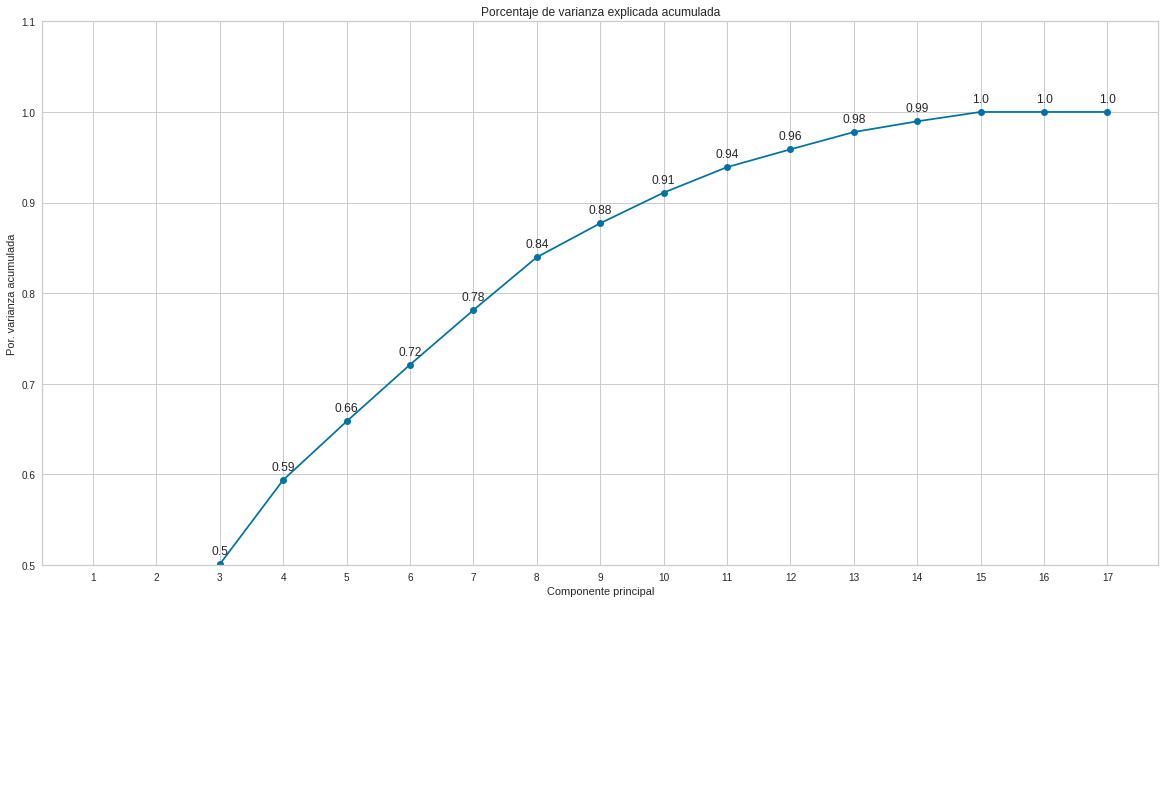

In [ ]:
# Porcentaje de varianza explicada acumulada
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
ax.plot(
    np.arange(len(mldf_PCA.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(mldf_PCA.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0.5, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [ ]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
prop_varianza_acum

array([0.22864366, 0.38603304, 0.50073686, 0.59373542, 0.65839868,
       0.72099558, 0.78127611, 0.83964084, 0.87712757, 0.91089012,
       0.93906984, 0.95869944, 0.97780935, 0.98965508, 1.        ,
       1.        , 1.        ])

In [ ]:
# Proyección de las observaciones de entrenamiento
proyecciones = pca_pipe.transform(X=mldf_PCA)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4' ,
               'PC5', 'PC6', 'PC7', 'PC8',
               'PC9', 'PC10', 'PC11', 'PC12' ,
               'PC13', 'PC14', 'PC15', 'PC16', 'PC17' ],
    index   = mldf_PCA.index
)
proyecciones.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.228686 -2.740313 -1.271390 -1.341030  0.073088 -0.708416 -0.040507   
1 -0.786953 -1.886573  0.618586  0.342581 -0.151804 -1.182859 -0.427214   
2  1.340059  1.320078 -0.806793 -0.910017 -0.197651 -0.195191  0.067689   
3  1.930426 -1.869222 -0.235581 -0.356113  0.125110 -0.233431 -0.085993   
4 -1.981287  1.684079 -0.693753  0.525707 -0.290970 -0.095100 -0.059406   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  1.210686  0.612127 -0.314266 -0.365756  0.713722 -0.225043  0.046832   
1  1.047161 -0.584652 -0.728256 -0.374657 -0.118843 -0.883248  0.039212   
2  1.042242  0.094062  2.640472  0.347410  0.447155  0.090160 -0.370907   
3  0.232633 -0.210273  0.424485 -0.223164  0.435021 -0.051999  0.255088   
4 -0.399959 -0.200184  0.176220  0.035234  0.041529  0.035418 -0.080190   

       PC15          PC16          PC17  
0 -0.176139 -1.470013e-15  9.803992e-16  
1  0.030611 -1.621342e-15 -9.741106e-16  
2 -0.920506  2.327052e-15  7.181536e-16  
3  0.008457 -1.296636e-15  9.850455e-16  
4  0.169677  2.157698e-15 -1.354633e-15

##### Random forest

In [ ]:
mldf_PCA.columns

Index(['neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room', 'latitude',
       'longitude', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',
       'Security Deposit', 'Cleaning Fee'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X=mldf_PCA[['neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room',
       'latitude', 'longitude',
       'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds',  'Security Deposit', 'Cleaning Fee',
      ]]
y= mldf_PCA['Price'].astype('int64')

In [ ]:
X_trainPCA, X_testPCA, y_trainPCA, y_testPCA = train_test_split(X_new, y, test_size=0.30, random_state=42)

In [ ]:
clf = RandomForestClassifier(max_depth=6, random_state=42, n_estimators=30,criterion='gini')
clf.fit(X_trainPCA, y_trainPCA)

RandomForestClassifier(max_depth=6, n_estimators=30, random_state=42)

In [ ]:
y_predPCA= clf.predict(X_testPCA)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_testPCA, y_predPCA)

0.6732693077230892

Luego de aplicar la reducción de dimensionalidad, no se evidencia una mejora en el modelo de ML

#### Clasificación no sueprvisada


In [ ]:
# Se prueba implementar un algoritmo de clasificación no sueprvisada

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples,calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# diccionarios vacios para ser almacenados los resultados
sse,db,slc,cal = {}, {}, {}, {}
for k in range(2, 10):
    # semilla de 10 para asegurar reproducibilidad
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(X) # Algoritmo K means
    #if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_ # Extraccion de labels
    sse[k] = kmeans.inertia_ # Inercia: Suma de las distancias de las muestras a su centroide mas cercano
    db[k] = davies_bouldin_score(X,clusters) # Calculo del indice de Davies Bouldin
    slc[k] = silhouette_score(X,clusters) # Calculo del indice de Silhouette
    cal[k] = calinski_harabasz_score(X,clusters) # Calculo del indice de Calinski-Harabasz

In [ ]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


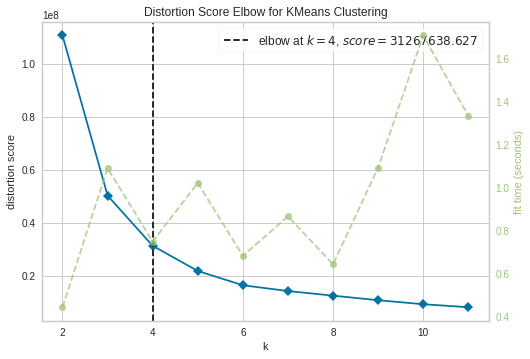

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(X)  
visualizer.show()

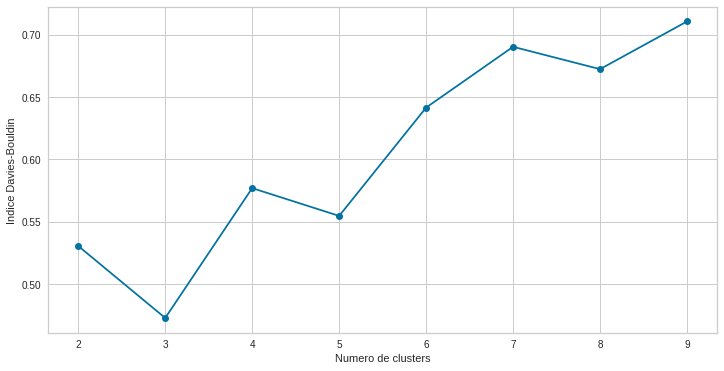

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(list(db.keys()), list(db.values()),marker='o')
plt.xlabel("Numero de clusters")
plt.ylabel("Indice Davies-Bouldin") # mas bajo mejor
plt.show()

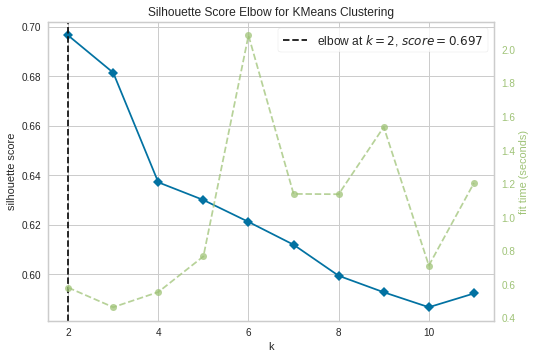

In [ ]:
visualizer = KElbowVisualizer(model, k=(2,12),metric='silhouette')
visualizer.fit(X)  
visualizer.show()

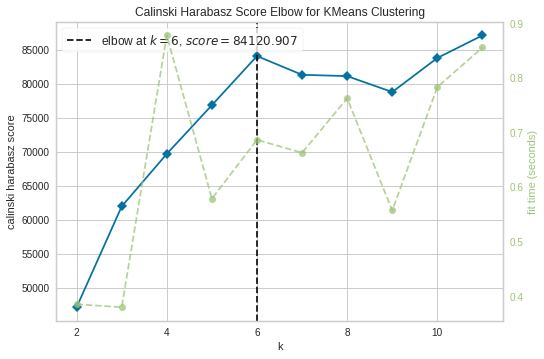

In [ ]:
visualizer = KElbowVisualizer(model, k=(2,12),metric='calinski_harabasz')
visualizer.fit(X)  
visualizer.show()

El alogritmo no logra marcar centroides bien diferenciados bajo el punto de vista de todas las métricas. Aquellas que arrojan 2 o 3 centroideshace que el agrupamiento absoreva a los grupos más débiles y las que identifican a 4 o 6 grupos podrían estar



In [ ]:
X= X.values #convertir a matriz

In [ ]:
clusterer = KMeans(n_clusters=2,max_iter=1000, random_state=10)
cluster_labels = clusterer.fit_predict(X)
print(cluster_labels)

[0 0 0 ... 1 1 1]


In [ ]:
# El score de silhouette_score da el promedio de todos los valores 
silhouette_avg = silhouette_score(X, cluster_labels)
print(silhouette_avg)
print("Para n_clusters =", 2,"El promedio del score de silhouette es: ", silhouette_avg)

0.696621666610514
Para n_clusters = 2 El promedio del score de silhouette es:  0.696621666610514


In [ ]:
# Calcular el score de silhouette para cada muestra 
sample_silhouette_values = silhouette_samples(X, cluster_labels)
print(sample_silhouette_values)

[0.62747802 0.21541445 0.59353301 ... 0.85967544 0.86032067 0.86095208]


In [ ]:
cluster_labels==0

array([ True,  True,  True, ..., False, False, False])

In [ ]:
# Agregar los scores de silhouette para las muestras pertenecientes al cluster i y ordenarlos 
ith_cluster_silhouette_values =sample_silhouette_values[cluster_labels ==0] # filtro del label
ith_cluster_silhouette_values.sort() # Ordenar
print(ith_cluster_silhouette_values)
size_cluster_i = ith_cluster_silhouette_values.shape[0] # Tamaño de clusters
print(size_cluster_i)

[-0.02055449 -0.01945262 -0.01936219 ...  0.65077623  0.65077923
  0.65078095]
4356


In [ ]:
import matplotlib.cm as cm

Para n_clusters = 2 El promedio del score de silhouette es:  0.696621666610514
Para n_clusters = 3 El promedio del score de silhouette es:  0.6815473948148899
Para n_clusters = 4 El promedio del score de silhouette es:  0.6371865984657922
Para n_clusters = 5 El promedio del score de silhouette es:  0.6300421481884018
Para n_clusters = 6 El promedio del score de silhouette es:  0.6211882337820336
Para n_clusters = 7 El promedio del score de silhouette es:  0.6135643216720581
Para n_clusters = 8 El promedio del score de silhouette es:  0.5978683994288122
Para n_clusters = 9 El promedio del score de silhouette es:  0.5965544843563113


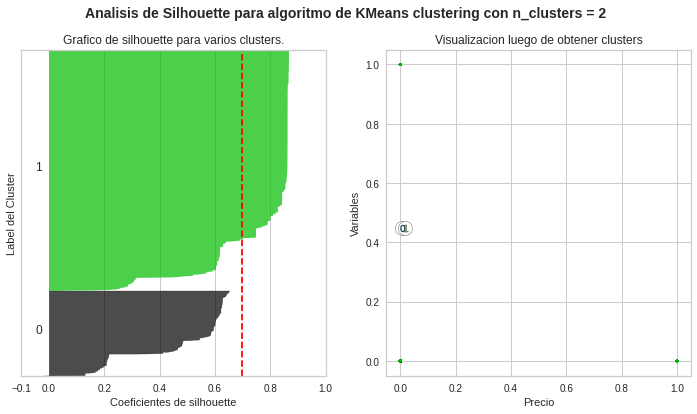

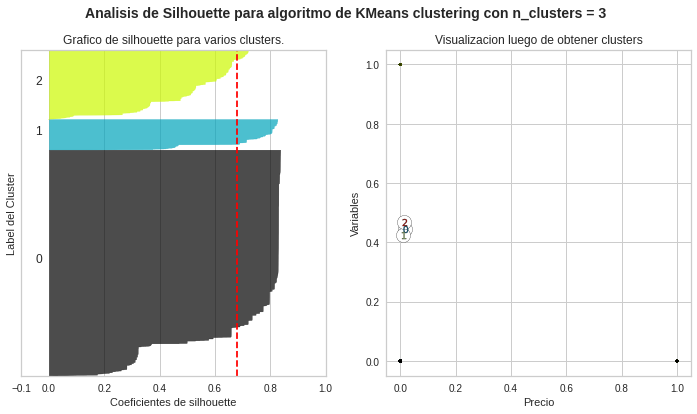

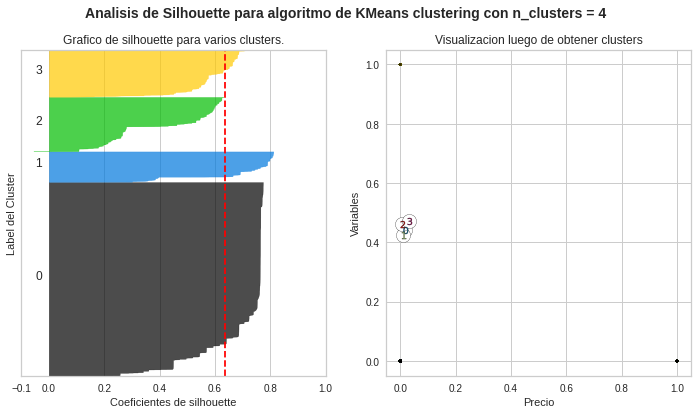

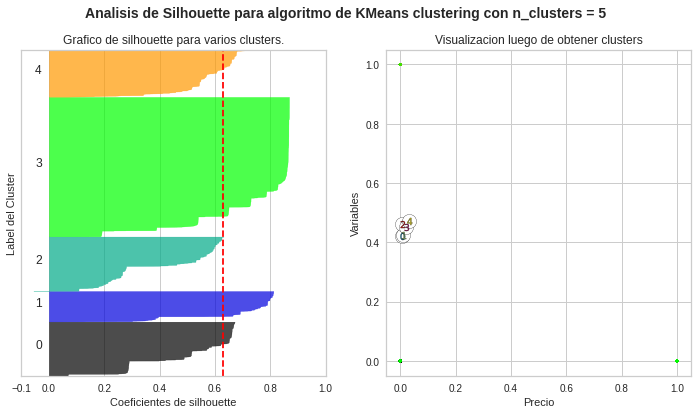

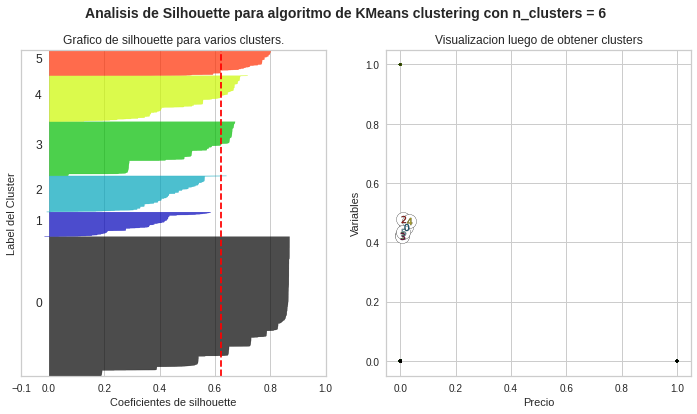

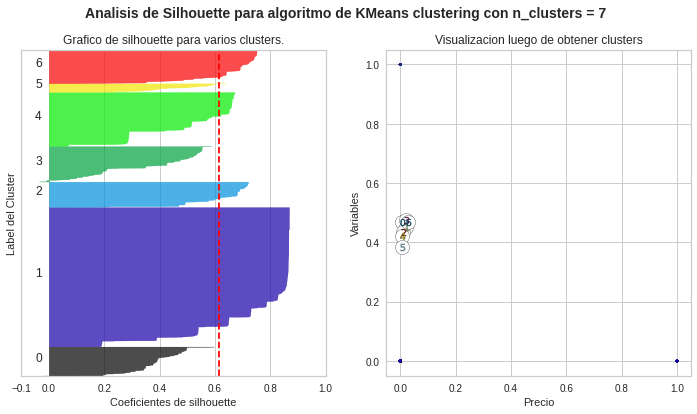

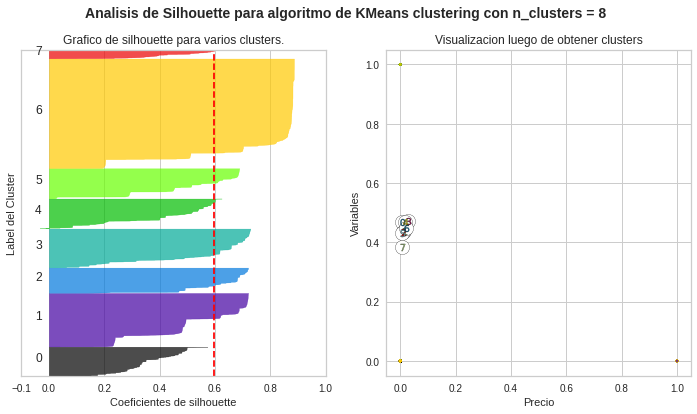

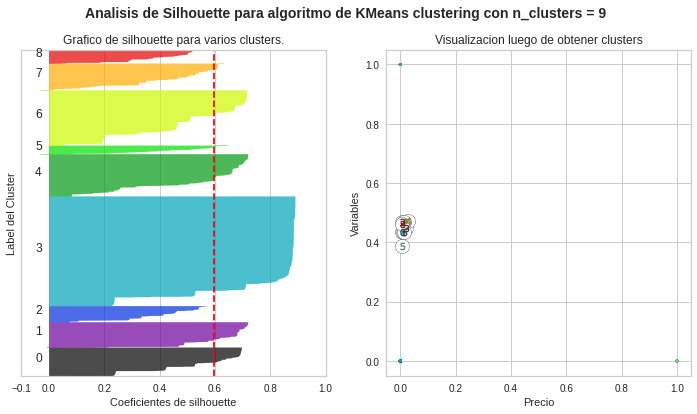

In [ ]:
for n_clusters in range(2, 10):
    # Crear un subplot de 1 fila y 2 columnas
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 6)
    # El 1 subplot es para el score de silhouette 
    # El rango del Ind. silhouette es [-1, 1]
    ax1.set_xlim([-0.1, 1]) # para nuestro caso lo voy a dejar en este rango
    # El (n_clusters+1)*10 es para insertar un espacio en blanco entre la silueta
     # y el grafico de la nube de puntos
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # Iniciamos el proceso de ajuste a los datos
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # El score de silhouette_score da el promedio de todos los valores 
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters, "El promedio del score de silhouette es: ", silhouette_avg)
    # Calcular el score de silhouette para cada muestra 
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Agregar los scores de silhouette para las muestras pertenecientes al cluster i y ordenarlos 
        ith_cluster_silhouette_values =sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort() # Ordenar
        size_cluster_i = ith_cluster_silhouette_values.shape[0] # Tamaño de clusters
        y_upper = y_lower + size_cluster_i 
        color = cm.nipy_spectral(float(i) / n_clusters) # Definir paleta de colores
        ax1.fill_betweenx(np.arange(y_lower, y_upper), # limites en y
                          0, ith_cluster_silhouette_values, #limites en x
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Etiquetar las graficas de silhouette con sus miembros de cluster en el medio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Calcular el nuevo y_lower para la proxima grafica
        y_lower = y_upper + 10 
    ax1.set_title("Grafico de silhouette para varios clusters.")
    ax1.set_xlabel("Coeficientes de silhouette")
    ax1.set_ylabel("Label del Cluster")
    # La linea vertical para el promedio del score de silhouette de todos los valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Quitar labels en y 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]) # definir ticks para comparacion

    # 2 grafica mostrando los clusters formados 
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters) # definir colores
    ax2.scatter(X[:, 2], X[:, 3], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k') # scatterplot
    # Etiquetar a los clusters
    centers = clusterer.cluster_centers_
    # Dibujar en color blanco los centroides de los clusters
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
    # Enumerar los centroides
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

    ax2.set_title("Visualizacion luego de obtener clusters")
    ax2.set_xlabel("Precio")
    ax2.set_ylabel("Variables")

    plt.suptitle(("Analisis de Silhouette para algoritmo de KMeans clustering "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Para clusters entre 2 y 8 se evidencia problemas que tienen que ver con:
- La existencia de grupos con puntuaciones de silueta por debajo del promedio
- Amplias fluctuaciones en el tamaño de los grupos de silueta


####Crossvalidation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 
random_forest = RandomForestRegressor()

In [ ]:
#Definimos los parámetros de búsqueda
params = {
    'n_estimators' : [50,100],
    'max_features': [2,4,5],
    'criterion': ['squared_error', 'mse'], # 'absolute_error', 'poisson'
    'max_depth':[4,5]
}

grid_random_forest = GridSearchCV(estimator = random_forest,
                                  param_grid = params,
                                  scoring = 'neg_mean_absolute_error',  # 
                                  cv = 5, 
                                  verbose = 1, #Muestra el resultado en pantalla
                                  n_jobs = -1) # corrida en paralelo

In [ ]:
%%time
#Entrenamos el modelo 
grid_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: user 1.57 s, sys: 394 ms, total: 1.96 s
Wall time: 36 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'mse'],
                         'max_depth': [4, 5], 'max_features': [2, 4, 5],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
#Obtenemos el mejor modelo
grid_random_forest.best_estimator_

RandomForestRegressor(criterion='mse', max_depth=4, max_features=2)

In [ ]:
grid_random_forest.best_params_

{'criterion': 'mse', 'max_depth': 4, 'max_features': 2, 'n_estimators': 100}

In [ ]:
random_forest_nuevo = RandomForestRegressor(criterion='mse',max_depth=5, max_features= 5, n_estimators=50) #Instanciamos el modelo

In [ ]:
random_forest_nuevo.fit(X_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=5, max_features=5,
                      n_estimators=50)

In [ ]:
random_forest_nuevo.predict(X_train)
random_forest_nuevo.predict(X_test)

array([ 0.24012252, -0.04512845, -0.41260566, ..., -0.23317986,
        0.31170724,  0.25491554])

In [ ]:
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

          -3       0.00      0.00      0.00        29
          -2       0.00      0.00      0.00         5
          -1       0.00      0.00      0.00       738
           0       0.66      1.00      0.79      3274
           1       0.00      0.00      0.00       818
           2       0.00      0.00      0.00       134

    accuracy                           0.66      4998
   macro avg       0.11      0.17      0.13      4998
weighted avg       0.43      0.66      0.52      4998

